
<a id='top'></a>

1. [Preliminary Wrangling](#wrangling)

2. [Univariate](#univariate)

    1. [Borrower APR](#uni_v1)  
    2. [Borrower Rate](#uni_v2)    
    3. [Prosper Score](#uni_v3) 
    4. [Loan Original Amount](#uni_v4) 
    5. [Prosper Rating (Alpha)](#uni_v5)  
    5. [Occupation](#uni_v6) 
    <br>
3. [Bivariate](#bivariate)

    1. [Borrower APR & Employment Status](#bi_v1)  
    2. [Borrower Rate & Employment Status](#bi_v2)    
    3. [Borrower APR & Occupation](#bi_v3) 
    <br>
4. [Multivariate](#multivariate)

    1. [Borrower APR & Debt To Income Ratio By Alpha Rating](#multi_v1)  
    2. [Debt To Income Ration & Total Loan Amount by Prosper Rating (Alpha)](#multi_v2)    
    3. [Borrower APR Mean & Debt To Income Ratio Mean over time](#multi_v3) 
    4. [Loan Amounts & APR By Prosper Rating (Alpha) ](#multi_v4) 
    5. [Home Ownership & Prosper Score](#multi_v5)  
    <br>
5. [Conclutions](#conclusions)
    <br>


# Part I - Prosper Loan Dataset
## by Lex Romo

## Introduction
 
*This data set contains 113,937 loans with 81 variables on each loan, including loan amount, borrower rate (or interest rate), current loan status, borrower income, and many others.


## Preliminary Wrangling

<a id='wrangling'></a>


In [1]:
# import all packages and set plots to be embedded inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb

%matplotlib inline


# Set Column and Row display max

pd.set_option('display.max_columns', 500)
pd.set_option('max_colwidth', 800)
pd.set_option('display.max_rows', 1100)

sb.set_style("darkgrid")

In [2]:

# Load dataset and create DF
loans = pd.read_csv('./dataset/prosperLoanData.csv')
print(loans.shape)


loans.head(5)

(113937, 81)


,ListingKey,ListingNumber,ListingCreationDate,CreditGrade,Term,LoanStatus,ClosedDate,BorrowerAPR,BorrowerRate,LenderYield,EstimatedEffectiveYield,EstimatedLoss,EstimatedReturn,ProsperRating (numeric),ProsperRating (Alpha),ProsperScore,ListingCategory (numeric),BorrowerState,Occupation,EmploymentStatus,EmploymentStatusDuration,IsBorrowerHomeowner,CurrentlyInGroup,GroupKey,DateCreditPulled,CreditScoreRangeLower,CreditScoreRangeUpper,FirstRecordedCreditLine,CurrentCreditLines,OpenCreditLines,TotalCreditLinespast7years,OpenRevolvingAccounts,OpenRevolvingMonthlyPayment,InquiriesLast6Months,TotalInquiries,CurrentDelinquencies,AmountDelinquent,DelinquenciesLast7Years,PublicRecordsLast10Years,PublicRecordsLast12Months,RevolvingCreditBalance,BankcardUtilization,AvailableBankcardCredit,TotalTrades,TradesNeverDelinquent (percentage),TradesOpenedLast6Months,DebtToIncomeRatio,IncomeRange,IncomeVerifiable,StatedMonthlyIncome,LoanKey,TotalProsperLoans,TotalProsperPaymentsBilled,OnTimeProsperPayments,ProsperPaymentsLessThanOneMonthLate,ProsperPaymentsOneMonthPlusLate,ProsperPrincipalBorrowed,ProsperPrincipalOutstanding,ScorexChangeAtTimeOfListing,LoanCurrentDaysDelinquent,LoanFirstDefaultedCycleNumber,LoanMonthsSinceOrigination,LoanNumber,LoanOriginalAmount,LoanOriginationDate,LoanOriginationQuarter,MemberKey,MonthlyLoanPayment,LP_CustomerPayments,LP_CustomerPrincipalPayments,LP_InterestandFees,LP_ServiceFees,LP_CollectionFees,LP_GrossPrincipalLoss,LP_NetPrincipalLoss,LP_NonPrincipalRecoverypayments,PercentFunded,Recommendations,InvestmentFromFriendsCount,InvestmentFromFriendsAmount,Investors
0,1021339766868145413AB3B,193129,2007-08-26 19:09:29.263000000,C,36,Completed,2009-08-14 00:00:00,0.16516,0.1580,0.1380,NaN,NaN,NaN,NaN,NaN,NaN,0,CO,Other,Self-employed,2.0,True,True,NaN,2007-08-26 18:41:46.780000000,640.0,659.0,2001-10-11 00:00:00,5.0,4.0,12.0,1,24.0,3.0,3.0,2.0,472.0,4.0,0.0,0.0,0.0,0.00,1500.0,11.0,0.81,0.0,0.17,"$25,000-49,999",True,3083.333333,E33A3400205839220442E84,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,NaN,78,19141,9425,2007-09-12 00:00:00,Q3 2007,1F3E3376408759268057EDA,330.43,11396.14,9425.00,1971.14,-133.18,0.0,0.0,0.0,0.0,1.0,0,0,0.0,258
1,10273602499503308B223C1,1209647,2014-02-27 08:28:07.900000000,NaN,36,Current,NaN,0.12016,0.0920,0.0820,0.07960,0.0249,0.05470,6.0,A,7.0,2,CO,Professional,Employed,44.0,False,False,NaN,2014-02-27 08:28:14,680.0,699.0,1996-03-18 00:00:00,14.0,14.0,29.0,13,389.0,3.0,5.0,0.0,0.0,0.0,1.0,0.0,3989.0,0.21,10266.0,29.0,1.00,2.0,0.18,"$50,000-74,999",True,6125.000000,9E3B37071505919926B1D82,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,NaN,0,134815,10000,2014-03-03 00:00:00,Q1 2014,1D13370546739025387B2F4,318.93,0.00,0.00,0.00,0.00,0.0,0.0,0.0,0.0,1.0,0,0,0.0,1
2,0EE9337825851032864889A,81716,2007-01-05 15:00:47.090000000,HR,36,Completed,2009-12-17 00:00:00,0.28269,0.2750,0.2400,NaN,NaN,NaN,NaN,NaN,NaN,0,GA,Other,Not available,NaN,False,True,783C3371218786870A73D20,2007-01-02 14:09:10.060000000,480.0,499.0,2002-07-27 00:00:00,NaN,NaN,3.0,0,0.0,0.0,1.0,1.0,NaN,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.06,Not displayed,True,2083.333333,6954337960046817851BCB2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,NaN,86,6466,3001,2007-01-17 00:00:00,Q1 2007,5F7033715035555618FA612,123.32,4186.63,3001.00,1185.63,-24.20,0.0,0.0,0.0,0.0,1.0,0,0,0.0,41
3,0EF5356002482715299901A,658116,2012-10-22 11:02:35.010000000,NaN,36,Current,NaN,0.12528,0.0974,0.0874,0.08490,0.0249,0.06000,6.0,A,9.0,16,GA,Skilled Labor,Employed,113.0,True,False,NaN,2012-10-22 11:02:32,800.0,819.0,1983-02-28 00:00:00,5.0,5.0,29.0,7,115.0,0.0,1.0,4.0,10056.0,14.0,0.0,0.0,1444.0,0.04,30754.0,26.0,0.76,0.0,0.15,"$25,000-49,999",True,2875.000000,A0393664465886295619C51,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,NaN,16,77296,10000,2012-11-01 00:00:00,Q4 2012,9ADE356069835475068C6D2,321.45,5143.20,4091.09,1052.11,-108.01,0.0,0.0,0.0,0.0,1.0,0,0,0.0,158
4,0F023589499656230C5E3E2,909464,2013-09-14 18:38:39.097000000,NaN,36,Current,NaN,0.24614,0.2085,0.1985,0.18316,0.0925,0.09066,3.0,D,4.0,2,MN

Before I can tell what the structure of the dataset is, let's take a look at the shape

In [3]:
loans.shape

(113937, 81)

In [4]:
loans.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 113937 entries, 0 to 113936
Data columns (total 81 columns):
 #   Column                               Non-Null Count   Dtype  
---  ------                               --------------   -----  
 0   ListingKey                           113937 non-null  object 
 1   ListingNumber                        113937 non-null  int64  
 2   ListingCreationDate                  113937 non-null  object 
 3   CreditGrade                          28953 non-null   object 
 4   Term                                 113937 non-null  int64  
 5   LoanStatus                           113937 non-null  object 
 6   ClosedDate                           55089 non-null   object 
 7   BorrowerAPR                          113912 non-null  float64
 8   BorrowerRate                         113937 non-null  float64
 9   LenderYield                          113937 non-null  float64
 10  EstimatedEffectiveYield              84853 non-null   float64
 11  EstimatedLoss



The following columns are 80% + Nulls and thus we will remove them from the dataset as they will not help with our explaratory phase:

CreditGrade, ClosedDate, GroupKey, TotalProsperLoans, TotalProsperPaymentsBilled, OnTimeProsperPayments, ProsperPaymentsLessThanOneMonthLate, ProsperPaymentsOneMonthPlusLate, ProsperPrincipalBorrowed, ProsperPrincipalOutstanding, ScorexChangeAtTimeOfListing, LoanFirstDefaultedCycleNumber, GroupKey


In [5]:
cols_to_drop = ['CreditGrade','ClosedDate', 'GroupKey', 'TotalProsperLoans','TotalProsperPaymentsBilled', 'OnTimeProsperPayments', 'ProsperPaymentsLessThanOneMonthLate', 'ProsperPaymentsOneMonthPlusLate', 'ProsperPrincipalBorrowed', 'ProsperPrincipalOutstanding', 'ScorexChangeAtTimeOfListing', 'LoanFirstDefaultedCycleNumber', 'GroupKey']

loans.drop(columns=cols_to_drop, inplace=True)


In [6]:
loans.shape

(113937, 69)

In [7]:
loans.sample(5)

,ListingKey,ListingNumber,ListingCreationDate,Term,LoanStatus,BorrowerAPR,BorrowerRate,LenderYield,EstimatedEffectiveYield,EstimatedLoss,EstimatedReturn,ProsperRating (numeric),ProsperRating (Alpha),ProsperScore,ListingCategory (numeric),BorrowerState,Occupation,EmploymentStatus,EmploymentStatusDuration,IsBorrowerHomeowner,CurrentlyInGroup,DateCreditPulled,CreditScoreRangeLower,CreditScoreRangeUpper,FirstRecordedCreditLine,CurrentCreditLines,OpenCreditLines,TotalCreditLinespast7years,OpenRevolvingAccounts,OpenRevolvingMonthlyPayment,InquiriesLast6Months,TotalInquiries,CurrentDelinquencies,AmountDelinquent,DelinquenciesLast7Years,PublicRecordsLast10Years,PublicRecordsLast12Months,RevolvingCreditBalance,BankcardUtilization,AvailableBankcardCredit,TotalTrades,TradesNeverDelinquent (percentage),TradesOpenedLast6Months,DebtToIncomeRatio,IncomeRange,IncomeVerifiable,StatedMonthlyIncome,LoanKey,LoanCurrentDaysDelinquent,LoanMonthsSinceOrigination,LoanNumber,LoanOriginalAmount,LoanOriginationDate,LoanOriginationQuarter,MemberKey,MonthlyLoanPayment,LP_CustomerPayments,LP_CustomerPrincipalPayments,LP_InterestandFees,LP_ServiceFees,LP_CollectionFees,LP_GrossPrincipalLoss,LP_NetPrincipalLoss,LP_NonPrincipalRecoverypayments,PercentFunded,Recommendations,InvestmentFromFriendsCount,InvestmentFromFriendsAmount,Investors
16178,13CD3390134107369B56F6C,140757,2007-05-21 11:52:32.480000000,36,Chargedoff,0.21948,0.2009,0.1909,NaN,NaN,NaN,NaN,NaN,NaN,0,OR,Clerical,Full-time,5.0,False,False,2007-05-16 14:50:02.837000000,560.0,579.0,1988-11-01 00:00:00,6.0,3.0,16.0,2,30.0,4.0,8.0,3.0,5604.0,14.0,3.0,2.0,967.0,0.97,28.0,13.0,0.53,1.0,0.10,"$50,000-74,999",True,4291.666667,28EC33909705894839547EA,1896,82,15481,1000,2007-05-30 00:00:00,Q2 2007,A1223388558421761E34292,37.21,669.78,424.53,245.25,-12.21,0.0,575.45,575.47,0.0,1.0,1,0,0.0,40
20732,15E63559659157331AE72F6,645713,2012-09-26 15:25:05.683000000,36,Current,0.21434,0.1774,0.1674,0.1636,0.0649,0.0987,4.0,C,8.0,9,FL,Other,Employed,118.0,True,False,2012-09-26 15:25:04,720.0,739.0,1983-01-01 00:00:00,8.0,5.0,29.0,5,248.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,71968.0,0.00,530.0,25.0,0.88,1.0,0.08,"$25,000-49,999",True,3666.666667,FB4A3664317715837C1AA2C,0,17,75847,7000,2012-10-10 00:00:00,Q4 2012,A7E73559258030967626DB3,252.15,4034.40,2658.42,1375.98,-77.56,0.0,0.00,0.00,0.0,1.0,0,0,0.0,122
101109,EFDA3521388402555C3262D,516981,2011-07-18 15:23:11.650000000,36,Completed,0.35643,0.3199,0.3099,0.2957,0.1470,0.1487,2.0,E,4.0,1,MD,Engineer - Electrical,Employed,127.0,True,False,2011-07-18 14:42:23,720.0,739.0,1990-03-01 00:00:00,18.0,16.0,47.0,8,976.0,0.0,6.0,0.0,0.0,1.0,0.0,0.0,42461.0,0.85,6354.0,41.0,0.95,0.0,0.38,"$100,000+",True,10499.916667,4A99362560218297936A150,0,32,51358,2600,2011-07-20 00:00:00,Q3 2011,9B97346544972921839B7A9,113.23,3071.40,2600.00,471.40,-14.73,0.0,0.00,0.00,0.0,1.0,0,0,0.0,26
90360,41443406976070075C9AD06,236700,2007-11-24 13:10:44.110000000,36,Completed,0.25517,0.2400,0.2300,NaN,NaN,NaN,NaN,NaN,NaN,0,WA,Other,Full-time,10.0,False,False,2007-10-30 23:46:09.420000000,540.0,559.0,2001-06-08 00:00:00,7.0,5.0,21.0,2,15.0,1.0,8.0,1.0,0.0,33.0,1.0,0.0,635.0,1.05,5.0,14.0,0.44,2.0,0.28,"$25,000-49,999",True,2500.000000,4E853407881411314D55402,0,75,22521,1500,2007-12-11 00:00:00,Q4 2007,D04B337297883546951478F,58.85,1998.72,1500.00,498.72,-20.78,0.0,0.00,0.00,0.0,1.0,1,0,0.0,1
75338,59A5353599911316047304D,547158,2011-12-28 06:45:22.503000000,36,Completed,0.08381,0.0804,0.0704,0.0704,0.0150,0.0554,7.0,AA,10.0,1,MN,Computer Programmer,Employed,62.0,True,True,2011-12-28 06:45:20,780.0,799.0,1998-08-31 00:00:00,11.0,10.0,34.0,9,351.0,1.0,6.0,0.0,0.0,0.0,0.0,0.0,23424.0,0.26,64576.0,34.0,1.00,0.0,0.07,"$75,000-99,999",True,6291.666667,926636385918604157078F2,0,26,58585,2500,2012-01-06 00:00:00,Q1 2012,0224346142833125343EE2F,78.39,2584.10,2500.00,84.10,-10.46,0.0,0.00,0.00,0.0,1.0,0,0,0.0,48


In [8]:
loans.ListingCreationDate.describe()

count                            113937
unique                           113064
top       2013-10-02 17:20:16.550000000
freq                                  6
Name: ListingCreationDate, dtype: object

### What is the structure of your dataset?

* The dataset contains 113,937 rows and 69 features. 11 columns have been removed. 

### What is/are the main feature(s) of interest in your dataset?

* I am interested to know which occupation has the best and worst Prosper Score and which occupation gets a better APR/Rate. I am also interested to learn more about Debt To Income Ratio
<br>

### What features in the dataset do you think will help support your investigation into your feature(s) of interest?

* I would assume that an accupation with a higher income would result in a better/higher Prosper Score. We will also look at how income perhaps helps the borrower attain a better APR/Rate.


<b>PLEASE NOTE:</b> Prosper Score was added to accounts that originated after July 2009. With this being said, we will only look at records that have a Prosper Score. 



* <b>Features: </b> 

    * ProsperRating (Alpha):  (Wrost -> Best) 0 - N/A, HR, E, D, C, B, A, AA
 
    * ProsperRating (numeric):  (Wrost -> Best) 0 - N/A, 1, 2, 3, 4, 5, 6, 7

    * ProsperScore: A custom risk score which ranges from 1-10, with 10 being the best, or lowest risk score


In [9]:
# Convert [Listing Creation Date] & [FirstRecordedCreditLine] to Datetime type

loans['ListingCreationDate'] = loans['ListingCreationDate'].str[:10]
loans['FirstRecordedCreditLine'] = loans['FirstRecordedCreditLine'].str[:10]

loans['ListingCreationDate'] = pd.to_datetime(loans['ListingCreationDate'])

loans['FirstRecordedCreditLine'] = pd.to_datetime(loans['FirstRecordedCreditLine'])


In [10]:
loans.sample(5)

,ListingKey,ListingNumber,ListingCreationDate,Term,LoanStatus,BorrowerAPR,BorrowerRate,LenderYield,EstimatedEffectiveYield,EstimatedLoss,EstimatedReturn,ProsperRating (numeric),ProsperRating (Alpha),ProsperScore,ListingCategory (numeric),BorrowerState,Occupation,EmploymentStatus,EmploymentStatusDuration,IsBorrowerHomeowner,CurrentlyInGroup,DateCreditPulled,CreditScoreRangeLower,CreditScoreRangeUpper,FirstRecordedCreditLine,CurrentCreditLines,OpenCreditLines,TotalCreditLinespast7years,OpenRevolvingAccounts,OpenRevolvingMonthlyPayment,InquiriesLast6Months,TotalInquiries,CurrentDelinquencies,AmountDelinquent,DelinquenciesLast7Years,PublicRecordsLast10Years,PublicRecordsLast12Months,RevolvingCreditBalance,BankcardUtilization,AvailableBankcardCredit,TotalTrades,TradesNeverDelinquent (percentage),TradesOpenedLast6Months,DebtToIncomeRatio,IncomeRange,IncomeVerifiable,StatedMonthlyIncome,LoanKey,LoanCurrentDaysDelinquent,LoanMonthsSinceOrigination,LoanNumber,LoanOriginalAmount,LoanOriginationDate,LoanOriginationQuarter,MemberKey,MonthlyLoanPayment,LP_CustomerPayments,LP_CustomerPrincipalPayments,LP_InterestandFees,LP_ServiceFees,LP_CollectionFees,LP_GrossPrincipalLoss,LP_NetPrincipalLoss,LP_NonPrincipalRecoverypayments,PercentFunded,Recommendations,InvestmentFromFriendsCount,InvestmentFromFriendsAmount,Investors
95176,5BA835833300905688A2CA4,828565,2013-07-03,36,Current,0.12528,0.0974,0.0874,0.08490,0.0249,0.06000,6.0,A,6.0,1,FL,Professional,Employed,40.0,False,False,2013-07-03 21:39:22,720.0,739.0,2000-11-27,13.0,13.0,24.0,10,336.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,11088.0,0.52,9618.0,19.0,0.94,0.0,0.30,"$25,000-49,999",True,3750.000000,CD61368691595052522C7E3,0,8,95686,10000,2013-07-12 00:00:00,Q3 2013,B0C83582691357134AB6CAF,321.45,2247.4815,1718.22,529.2615,-54.62,0.00,0.00,0.00,0.00,1.0000,0,0,0.0,1
69466,7F603561206170108EAC4E3,654489,2012-10-15,60,Current,0.22262,0.1982,0.1882,0.17770,0.0574,0.12030,5.0,B,6.0,1,TX,Military Enlisted,Employed,197.0,True,False,2012-10-15 17:13:53,740.0,759.0,1996-03-13,12.0,10.0,22.0,8,252.0,0.0,1.0,1.0,104.0,0.0,0.0,0.0,12776.0,0.75,3502.0,20.0,0.90,1.0,0.43,"$75,000-99,999",True,6464.000000,7DAF3668850369801EBFA6A,0,16,78294,17623,2012-11-29 00:00:00,Q4 2012,41EF355955012261534327C,465.14,6977.1000,2940.13,4036.9700,-203.68,0.00,0.00,0.00,0.00,0.7049,0,0,0.0,59
6571,4D4933869710840175B31E1,129009,2007-04-26,36,Defaulted,0.20936,0.2020,0.1920,NaN,NaN,NaN,NaN,NaN,NaN,0,CA,Teacher,Full-time,331.0,False,True,2007-04-25 16:25:29.933000000,620.0,639.0,1981-08-04,6.0,3.0,37.0,3,86.0,1.0,11.0,14.0,9047.0,99.0,0.0,0.0,1110.0,0.87,158.0,27.0,0.16,1.0,0.21,"$25,000-49,999",True,3750.000000,82E433877602936679F1C42,737,82,14533,3000,2007-05-02 00:00:00,Q2 2007,C8D133653000333828E6A55,111.80,1103.0000,515.38,587.6200,-18.85,-788.32,2484.64,1333.86,1350.24,1.0000,0,0,0.0,69
52473,856D360307947286076649C,1155346,2014-02-11,36,Current,0.12727,0.0990,0.0890,0.08619,0.0274,0.05879,6.0,A,11.0,1,FL,Tradesman - Electrician,Employed,31.0,True,False,2014-02-10 14:37:34,800.0,819.0,1998-01-02,12.0,11.0,23.0,4,87.0,1.0,4.0,0.0,0.0,0.0,0.0,0.0,3798.0,0.15,21002.0,19.0,1.00,1.0,0.50,"$50,000-74,999",True,4511.833333,8FB53706978616832E9CE12,0,1,132819,15000,2014-02-25 00:00:00,Q1 2014,6D6E35480537225175DBB2A,483.30,0.0000,0.00,0.0000,0.00,0.00,0.00,0.00,0.00,1.0000,0,0,0.0,1
30728,E83F3554850646923810A79,625800,2012-08-18,60,Current,0.15936,0.1364,0.1264,0.12590,0.0249,0.10100,6.0,A,9.0,6,OH,Accountant/CPA,Employed,2.0,True,False,2012-08-18 07:42:04,720.0,739.0,1995-02-09,10.0,10.0,20.0,9,300.0,1.0,5.0,0.0,0.0,0.0,1.0,0.0,8180.0,0.45,8640.0,18.0,1.00,0.0,0.11,"$50,000-74,999",True,4583.333333,6C9A3659426417491C00A41,0,19,73430,8000,2012-08-30 00:00:00,Q3 2012,FABB3554956930962226FB1,184.66,3338.8800,1860.31,1478.5700,-107.29,0.00,0.00,0.00,0.00,1.0000,0,0,0.0,13


In [11]:
no_score = loans[loans['ListingCreationDate'] <= '2009-07-01']

no_score.ProsperScore

0        NaN
2        NaN
11       NaN
17       NaN
21       NaN
          ..
113921   NaN
113922   NaN
113923   NaN
113926   NaN
113927   NaN
Name: ProsperScore, Length: 29084, dtype: float64

In [12]:
loans = loans[loans['ListingCreationDate'] >= '2009-07-01']


## Univariate 
<a id='univariate'></a>

## Borrower APR

<a id='uni_v1'></a>
[Back to Top](#top)


> In this section, investigate distributions of individual variables. If
you see unusual points or outliers, take a deeper look to clean things up
and prepare yourself to look at relationships between variables.


Mean APR:  0.23
Median APR:  0.22
Mode APR:  0.35797
Range of APR:  0.37812
Interquartile range:  0.12926
Standard deviation:  0.0799158850778631
Number of outliers:  0


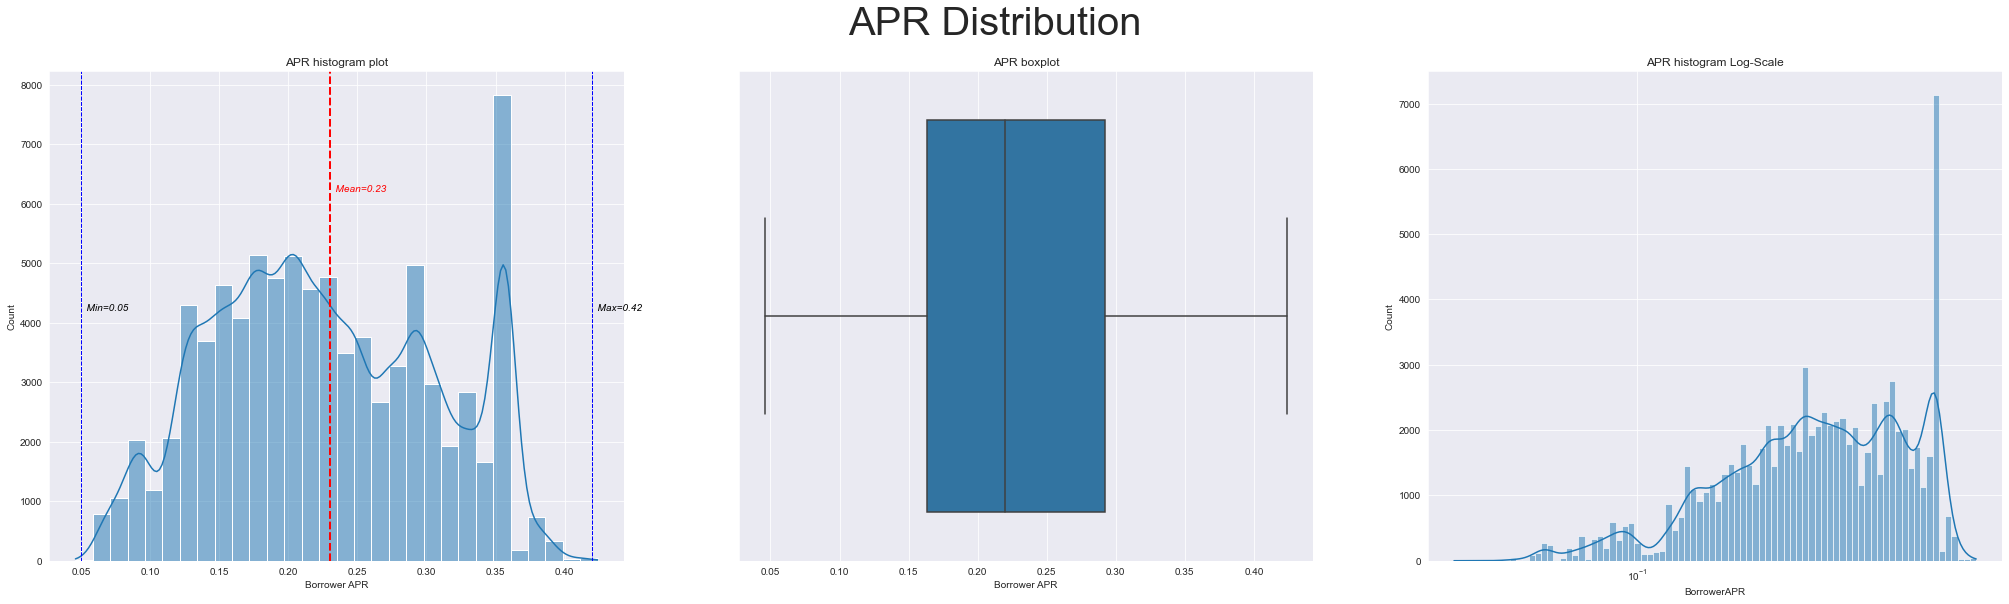

In [13]:
# creating 4 subplots axes[0], axes[1], axes[2] 
base_color = sb.color_palette()[0]
fig, ax = plt.subplots(1,3,figsize=[35, 9])


# main title:
fig.suptitle("APR Distribution", fontsize=40)

# creating a histogram
sb.histplot(data=loans, x='BorrowerAPR', bins=30, ax = ax[0], kde=True, color=base_color);
# creating a box plot
sb.boxplot(data=loans, x='BorrowerAPR', ax=ax[1]);
# creating a log-scale histogram
sb.histplot(data=loans, x='BorrowerAPR', kde=True, log_scale=True, ax=ax[2]);

# titles and labels
ax[0].set_title('APR histogram plot')
ax[1].set_title('APR boxplot')
ax[2].set_title('APR histogram Log-Scale')
ax[0].set_xlabel("Borrower APR");
ax[1].set_xlabel("Borrower APR");


APR_mean = np.round(loans["BorrowerAPR"].mean(), 2)
APR_min = np.round(loans["BorrowerAPR"].min(), 2)
APR_max = np.round(loans["BorrowerAPR"].max(), 2)
ax[0].axvline(APR_mean, color="red", linestyle="dashed", linewidth=2)
ax[0].axvline(APR_min, color="blue", linestyle="dashed", linewidth=1)
ax[0].axvline(APR_max, color="blue", linestyle="dashed", linewidth=1)


# Measures of central tendency
print("Mean APR: ", np.round(loans["BorrowerAPR"].mean(), 2))
print("Median APR: ", np.round(loans["BorrowerAPR"].median(), 2))
print("Mode APR: ", loans["BorrowerAPR"].mode()[0])


# Measures of dispersion
print("Range of APR: ", loans["BorrowerAPR"].max() - loans["BorrowerAPR"].min())
print("Interquartile range: ", loans["BorrowerAPR"].quantile(0.75) - loans["BorrowerAPR"].quantile(0.25))
print("Standard deviation: ", loans["BorrowerAPR"].std())

#Outlier detection
apr_q1 = loans["BorrowerAPR"].quantile(0.25)
apr_q3 = loans["BorrowerAPR"].quantile(0.75)
iqr = apr_q3 - apr_q1
outliers = loans[(loans["BorrowerAPR"] < (apr_q1 - 1.5 * iqr)) | (loans["BorrowerAPR"] > (apr_q3 + 1.5 * iqr))]
print("Number of outliers: ", outliers.shape[0])

ax[0].axvline(APR_mean, color="red", linestyle="dashed", linewidth=2)
ax[0].axvline(APR_min, color="blue", linestyle="dashed", linewidth=1)
ax[0].axvline(APR_max, color="blue", linestyle="dashed", linewidth=1)

ax[0].text(
    x=APR_mean,
    y=6200,
    s=f"  Mean={APR_mean}",
    style="italic",
    color='red'
)

ax[0].text(
    x=APR_min,
    y=4200,
    s=f"  Min={APR_min}",
    style="italic",
    color='k'
)

ax[0].text(
    x=APR_max,
    y=4200,
    s=f"  Max={APR_max}",
    style="italic",
    color='k'
)

plt.savefig('./Plots/Distribution-ProsperAPR.jpg', dpi=200)
plt.show()


In [14]:
loans.BorrowerAPR.count()

ARP = loans[loans['BorrowerAPR'] >= 0.35]

ARP.BorrowerAPR.count()

APR_above_35 =np.round(8800/84853, 3)

print(f' {APR_above_35*100}%')

 10.4%


* Based on the APR statistics the distribution for Borrower APR is:

    *  Unimodal: As we have a single mode Rate of 0.35797, the data has a single peak, meaning that the majority of the values are close to this value.

    * Skewed to the right: The mean APR is greater than the median APR of 0.23 > 0.22. This could mean that there are a few large values that are pulling the mean up, while the majority of the values are relatively small.
    
    * Narrow: The range of APR is 0.37812 and the Interquartile range is 0.12926 which means that the range of the data is relatively small and that most of the data falls within a narrow range.

    * No outliers : as the number of outliers is zero, so we can safely say that there are no values that are numerically distant from the rest of the data.

### Borrower Rate

<a id='uni_v2'></a>
[Back to Top](#top)

Mean Rate:  0.2
Median Rate:  0.19
Mode Rate:  0.3177
Range of Rate:  0.32
Interquartile range:  0.12150000000000002
Standard deviation:  0.07463113646525046
Number of outliers:  0


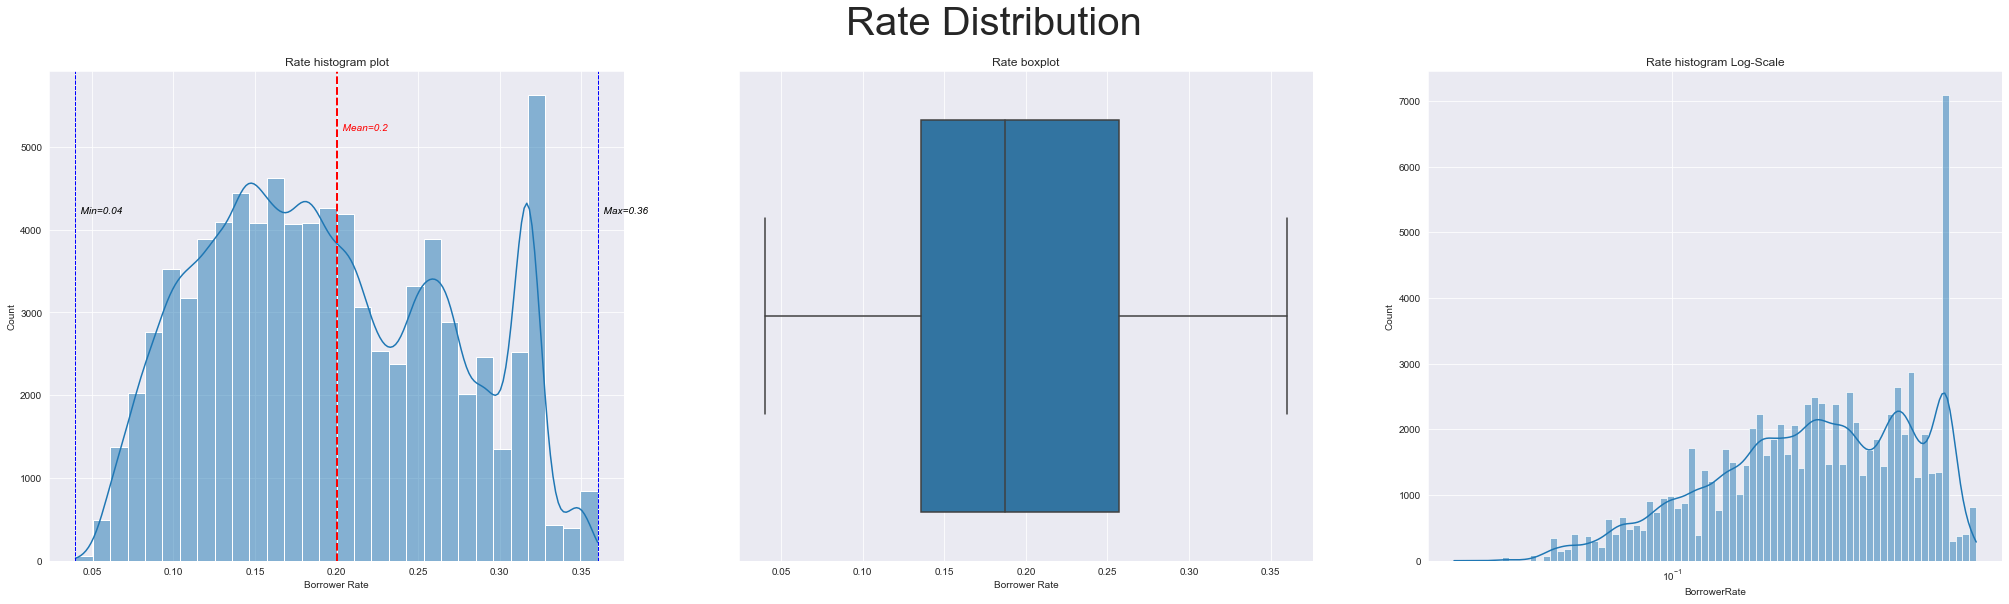

In [15]:
# creating 4 subplots axes[0], axes[1], axes[2] 
base_color = sb.color_palette()[0]
fig, ax = plt.subplots(1,3,figsize=[35, 9])


# main title:
fig.suptitle("Rate Distribution", fontsize=40)

# creating a histogram
sb.histplot(data=loans, x='BorrowerRate', bins=30, ax = ax[0], kde=True, color=base_color);
# creating a box plot
sb.boxplot(data=loans, x='BorrowerRate', ax=ax[1]);
# creating a log-scale histogram
sb.histplot(data=loans, x='BorrowerRate', kde=True, log_scale=True, ax=ax[2]);

# titles and labels
ax[0].set_title('Rate histogram plot')
ax[1].set_title('Rate boxplot')
ax[2].set_title('Rate histogram Log-Scale')
ax[0].set_xlabel("Borrower Rate");
ax[1].set_xlabel("Borrower Rate");


Rate_mean = np.round(loans["BorrowerRate"].mean(), 2)
Rate_min = np.round(loans["BorrowerRate"].min(), 2)
Rate_max = np.round(loans["BorrowerRate"].max(), 2)
ax[0].axvline(Rate_mean, color="red", linestyle="dashed", linewidth=2)
ax[0].axvline(Rate_min, color="blue", linestyle="dashed", linewidth=1)
ax[0].axvline(Rate_max, color="blue", linestyle="dashed", linewidth=1)


# Measures of central tendency
print("Mean Rate: ", np.round(loans["BorrowerRate"].mean(), 2))
print("Median Rate: ", np.round(loans["BorrowerRate"].median(), 2))
print("Mode Rate: ", loans["BorrowerRate"].mode()[0])


# Measures of dispersion
print("Range of Rate: ", loans["BorrowerRate"].max() - loans["BorrowerRate"].min())
print("Interquartile range: ", loans["BorrowerRate"].quantile(0.75) - loans["BorrowerRate"].quantile(0.25))
print("Standard deviation: ", loans["BorrowerRate"].std())

#Outlier detection
rate_q1 = loans["BorrowerRate"].quantile(0.25)
rate_q3 = loans["BorrowerRate"].quantile(0.75)
iqr = rate_q3 - rate_q1
outliers = loans[(loans["BorrowerRate"] < (rate_q1 - 1.5 * iqr)) | (loans["BorrowerRate"] > (rate_q3 + 1.5 * iqr))]
print("Number of outliers: ", outliers.shape[0])

ax[0].axvline(Rate_mean, color="red", linestyle="dashed", linewidth=2)
ax[0].axvline(Rate_min, color="blue", linestyle="dashed", linewidth=1)
ax[0].axvline(Rate_max, color="blue", linestyle="dashed", linewidth=1)

ax[0].text(
    x=Rate_mean,
    y=5200,
    s=f"  Mean={Rate_mean}",
    style="italic",
    color='red'
)

ax[0].text(
    x=Rate_min,
    y=4200,
    s=f"  Min={Rate_min}",
    style="italic",
    color='k'
)

ax[0].text(
    x=Rate_max,
    y=4200,
    s=f"  Max={Rate_max}",
    style="italic",
    color='k'
)

plt.savefig('./Plots/Distribution-ProsperRate.jpg', dpi=200)
plt.show()

* Based on the Rate statistics the distribution for Borrower Rate is:

    * Skewed to the right: The mean Rate is greater than the median Rate of 0.2 > 0.19. This could mean that there are a few large values that are pulling the mean up, while the majority of the values are relatively small.

    *  Unimodal: As we have a single mode Rate of 0.3177, the data has a single peak, meaning that the majority of the values are close to this value.

    * Narrow: The range of Rate is 0.32 and the Interquartile range is 0.1215 which means that the range of the data is relatively small and that most of the data falls within a narrow range.

    * No outliers : as the number of outliers is zero, so we can safely say that there are no values that are numerically distant from the rest of the data.

### Prosper Score

<a id='uni_v3'></a>
[Back to Top](#top)

Mean Score:  5.95
Median Score:  6.0
Mode Score:  4.0
Range of Prosper Score:  10.0
Interquartile range:  4.0
Standard deviation:  2.37650088818598
Number of outliers:  0


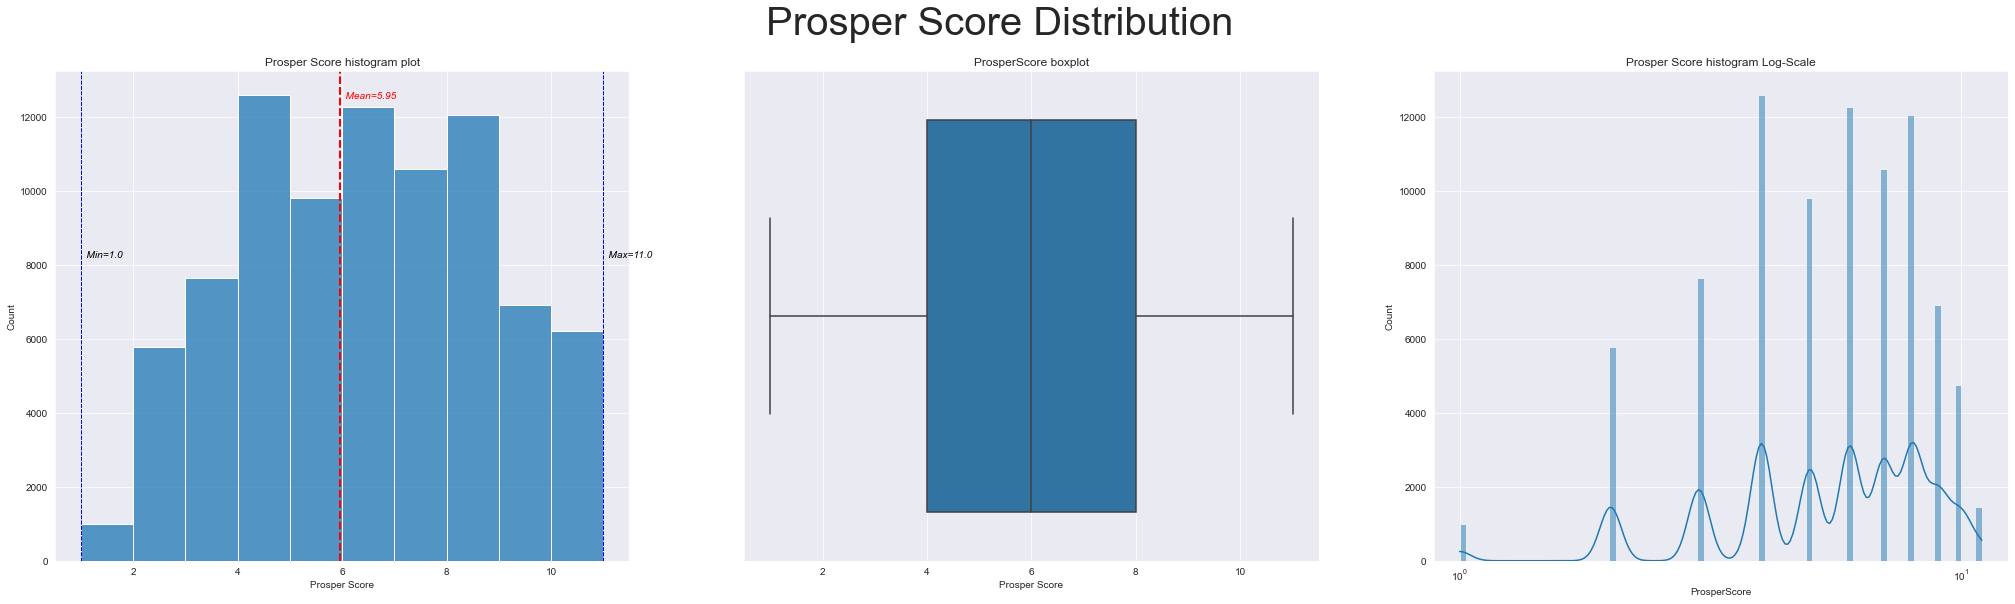

In [16]:
# creating 4 subplots axes[0], axes[1], axes[2] 
base_color = sb.color_palette()[0]
fig, ax = plt.subplots(1,3,figsize=[35, 9])

# main title:
fig.suptitle("Prosper Score Distribution", fontsize=40)

# creating a histogram
sb.histplot(data=loans, x='ProsperScore', bins=10, ax = ax[0], color=base_color);
# creating a box plot
sb.boxplot(data=loans, x='ProsperScore', ax=ax[1]);
# creating a log-scale histogram
sb.histplot(data=loans, x='ProsperScore', kde=True, log_scale=True, ax=ax[2]);

# titles and labels
ax[0].set_title('Prosper Score histogram plot')
ax[1].set_title('ProsperScore boxplot')
ax[2].set_title('Prosper Score histogram Log-Scale')
ax[0].set_xlabel("Prosper Score");
ax[1].set_xlabel("Prosper Score");


Score_mean = np.round(loans["ProsperScore"].mean(), 2)
Score_min = np.round(loans["ProsperScore"].min(), 2)
Score_max = np.round(loans["ProsperScore"].max(), 2)
ax[0].axvline(Score_mean, color="red", linestyle="dashed", linewidth=2)
ax[0].axvline(Score_min, color="blue", linestyle="dashed", linewidth=1)
ax[0].axvline(Score_max, color="blue", linestyle="dashed", linewidth=1)


# Measures of central tendency
print("Mean Score: ", np.round(loans["ProsperScore"].mean(), 2))
print("Median Score: ", np.round(loans["ProsperScore"].median(), 2))
print("Mode Score: ", loans["ProsperScore"].mode()[0])


# Measures of dispersion
print("Range of Prosper Score: ", loans["ProsperScore"].max() - loans["ProsperScore"].min())
print("Interquartile range: ", loans["ProsperScore"].quantile(0.75) - loans["ProsperScore"].quantile(0.25))
print("Standard deviation: ", loans["ProsperScore"].std())

#Outlier detection
score_q1 = loans["ProsperScore"].quantile(0.25)
score_q3 = loans["ProsperScore"].quantile(0.75)
iqr = score_q3 - score_q1
outliers = loans[(loans["ProsperScore"] < (score_q1 - 1.5 * iqr)) | (loans["ProsperScore"] > (score_q3 + 1.5 * iqr))]
print("Number of outliers: ", outliers.shape[0])

ax[0].axvline(Score_mean, color="red", linestyle="dashed", linewidth=2)
ax[0].axvline(Score_min, color="blue", linestyle="dashed", linewidth=1)
ax[0].axvline(Score_max, color="blue", linestyle="dashed", linewidth=1)

ax[0].text(
    x=Score_mean,
    y=12500,
    s=f"  Mean={Score_mean}",
    style="italic",
    color='red'
)

ax[0].text(
    x=Score_min,
    y=8200,
    s=f"  Min={Score_min}",
    style="italic",
    color='k'
)

ax[0].text(
    x=Score_max,
    y=8200,
    s=f"  Max={Score_max}",
    style="italic",
    color='k'
)

plt.savefig('./Plots/Distribution-ProsperScore.jpg', dpi=200)
plt.show()

* Based on the Score statistics the distribution for Prosper Score is:

    * Skewed to the left: The mean Score is less than the median Score of 5.95 < 6.0. This could mean that there are a few small values that are pulling the mean down, while the majority of the values are relatively large.

    * Multimodal: As we have a mode Score of 4.0 and this value doesn't match with the mean and median. which means the distribution has multiple peaks, This indicates that there might be multiple groups of data.

    * Wide: The range of Prosper Score is 10.0 and the Interquartile range is 4.0 which means that the range of the data is relatively wide and that there is a lot of spread in the data.

    * No outliers : as the number of outliers is zero, so we can safely say that there are no values that are numerically distant from the rest of the data.

## Loan Original Amount

<a id='uni_v4'></a>
[Back to Top](#top)

Mean Loan Amount:  9083.44
Median Loan Amount:  7500.0
Max Loan Amount:  35000
Mode Loan Amount:  4000
Range of Loan Amount:  34000
Interquartile range:  9500.0
Standard deviation:  6287.860057555329
Number of outliers:  641


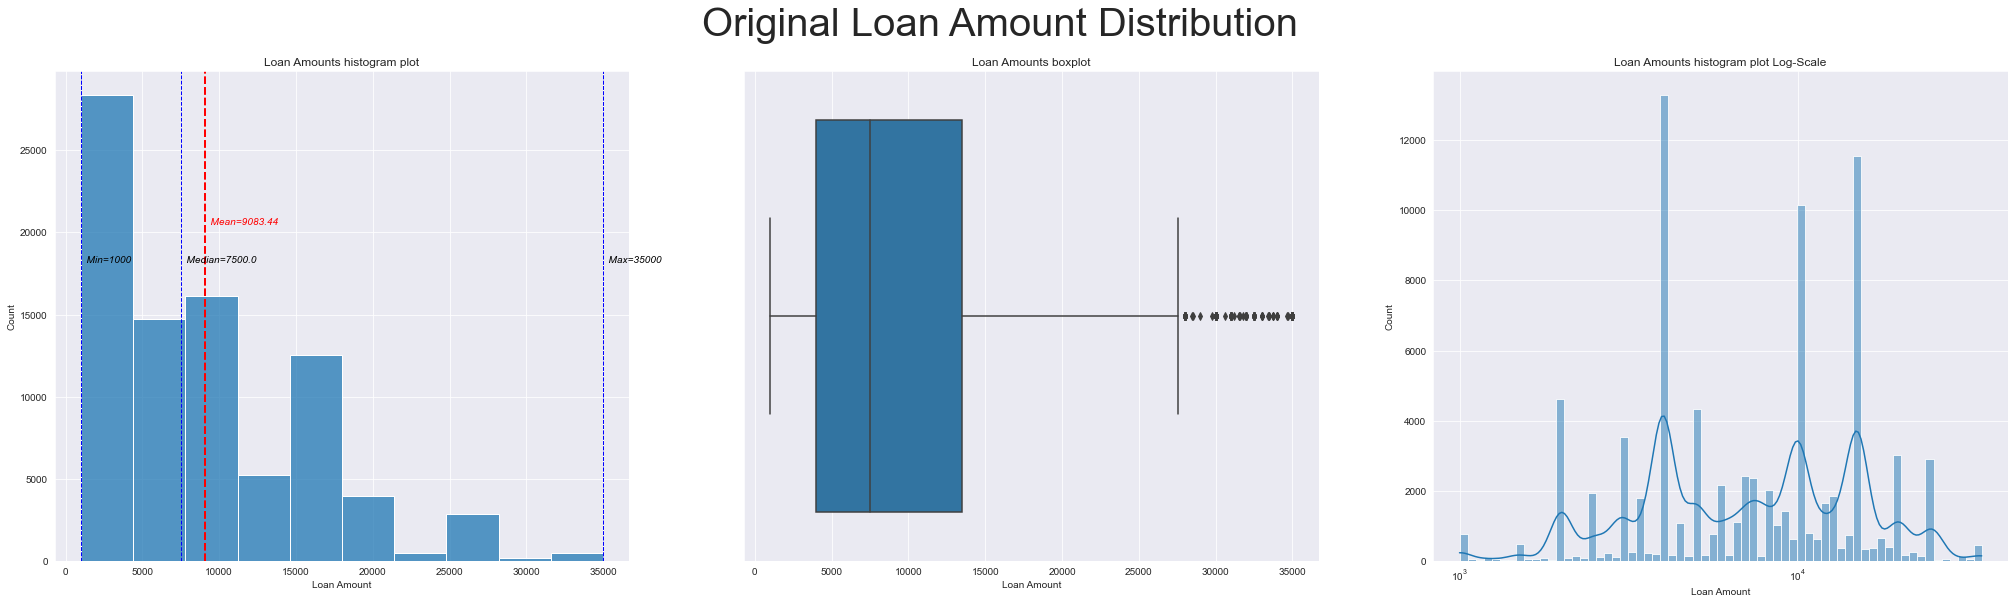

In [17]:
# creating 4 subplots axes[0], axes[1], axes[2] 
base_color = sb.color_palette()[0]
fig, ax = plt.subplots(1,3,figsize=[35, 9])


# main title:
fig.suptitle("Original Loan Amount Distribution", fontsize=40)

# creating a histogram
sb.histplot(data=loans, x='LoanOriginalAmount', bins=10, ax = ax[0], color=base_color);
# creating a box plot
sb.boxplot(data=loans, x='LoanOriginalAmount', ax=ax[1]);
# creating a log-scale histogram
sb.histplot(data=loans, x='LoanOriginalAmount', kde=True, log_scale=True, ax=ax[2]);

# titles and labels
ax[0].set_title('Loan Amounts histogram plot')
ax[1].set_title('Loan Amounts boxplot')
ax[2].set_title('Loan Amounts histogram plot Log-Scale')
ax[0].set_xlabel("Loan Amount");
ax[1].set_xlabel("Loan Amount");
ax[2].set_xlabel("Loan Amount");


loan_amounts_mean = np.round(loans["LoanOriginalAmount"].mean(), 2)
loan_amounts_min = np.round(loans["LoanOriginalAmount"].min(), 2)
loan_amounts_max = np.round(loans["LoanOriginalAmount"].max(), 2)
loan_amounts_median = np.round(loans["LoanOriginalAmount"].median(), 2)
ax[0].axvline(loan_amounts_mean, color="red", linestyle="dashed", linewidth=2)
ax[0].axvline(loan_amounts_min, color="blue", linestyle="dashed", linewidth=1)
ax[0].axvline(loan_amounts_max, color="blue", linestyle="dashed", linewidth=1)


# Measures of central tendency
print("Mean Loan Amount: ", np.round(loans["LoanOriginalAmount"].mean(), 2))
print("Median Loan Amount: ", np.round(loans["LoanOriginalAmount"].median(), 2))
print("Max Loan Amount: ", np.round(loans["LoanOriginalAmount"].max(), 2))
print("Mode Loan Amount: ", loans["LoanOriginalAmount"].mode()[0])


# Measures of dispersion
print("Range of Loan Amount: ", loans["LoanOriginalAmount"].max() - loans["LoanOriginalAmount"].min())
print("Interquartile range: ", loans["LoanOriginalAmount"].quantile(0.75) - loans["LoanOriginalAmount"].quantile(0.25))
print("Standard deviation: ", loans["LoanOriginalAmount"].std())

#Outlier detection
loan_amount_q1 = loans["LoanOriginalAmount"].quantile(0.25)
loan_amount_q3 = loans["LoanOriginalAmount"].quantile(0.75)
iqr = loan_amount_q3 - loan_amount_q1
outliers = loans[(loans["LoanOriginalAmount"] < (loan_amount_q1 - 1.5 * iqr)) | (loans["LoanOriginalAmount"] > (loan_amount_q3 + 1.5 * iqr))]
print("Number of outliers: ", outliers.shape[0])

ax[0].axvline(loan_amounts_mean, color="red", linestyle="dashed", linewidth=2)
ax[0].axvline(loan_amounts_min, color="blue", linestyle="dashed", linewidth=1)
ax[0].axvline(loan_amounts_max, color="blue", linestyle="dashed", linewidth=1)
ax[0].axvline(loan_amounts_median, color="blue", linestyle="dashed", linewidth=1)

ax[0].text(
    x=loan_amounts_mean,
    y=20500,
    s=f"  Mean={loan_amounts_mean}",
    style="italic",
    color='red'
)

ax[0].text(
    x=loan_amounts_min,
    y=18200,
    s=f"  Min={loan_amounts_min}",
    style="italic",
    color='k'
)

ax[0].text(
    x=loan_amounts_max,
    y=18200,
    s=f"  Max={loan_amounts_max}",
    style="italic",
    color='k'
)

ax[0].text(
    x=loan_amounts_median,
    y=18200,
    s=f"  Median={loan_amounts_median}",
    style="italic",
    color='k'
)

plt.savefig('./Plots/Distribution-LoanOriginalAmount.jpg', dpi=200)
plt.show()

* Based on the Loan Amount statistics the distribution for LoanOriginalAmount is:

    * The mean loan amount of $9,083.44 is higher than the median loan amount of $7,500.0, which suggests that the distribution may have a positive skew.
    
    * The mode of $4,000 is lower than the median and mean, which further supports the possibility of a positively skewed distribution.
    
    * The large range of $34,000 and the standard deviation of $6,287.86 also indicate that the data is spread out.
    
    * The presence of 641 outliers suggests that there are a significant number of observations that deviate significantly from the rest of the data.
    
    * Overall, It appears that the loan amount variable has a positively skewed distribution with a significant number of outliers.

## Prosper Rating (Alpha)

<a id='uni_v5'></a>
[Back to Top](#top)

In [18]:
income_mean = loans.groupby(['ProsperRating (Alpha)'])['StatedMonthlyIncome'].mean()

income_mean

ProsperRating (Alpha)
A     6743.737217
AA    7656.293963
B     6438.325835
C     5826.720814
D     5183.627324
E     5021.157283
HR    4850.780678
Name: StatedMonthlyIncome, dtype: float64

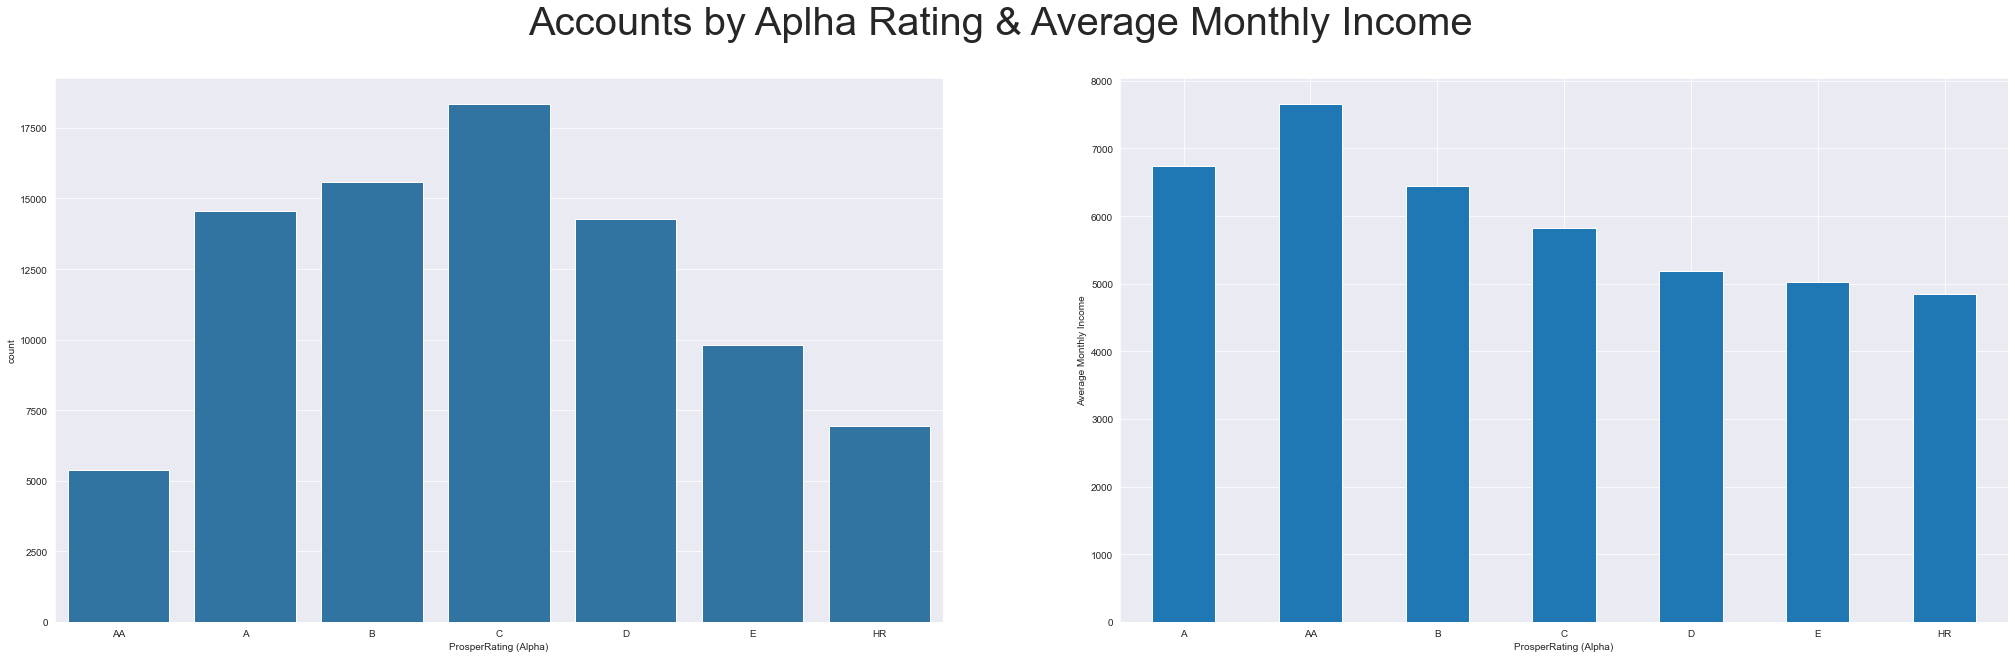

In [19]:
base_color = sb.color_palette()[0]
fig, ax = plt.subplots(1,2,figsize=[35, 10])

# Order best to worst (AA, A, B, C, D, E, HR)
rating_order=['AA', 'A', 'B', 'C', 'D', 'E', 'HR']

fig.suptitle("Accounts by Aplha Rating & Average Monthly Income", fontsize=40)

sb.countplot(x='ProsperRating (Alpha)', data=loans, order=rating_order, color=base_color, ax=ax[0]);
income_mean.plot(kind='bar',  ylabel='Average Monthly Income', xlabel='ProsperRating (Alpha)', ax=ax[1]);
plt.xticks(rotation='horizontal', size=10)

plt.savefig('./Plots/BarPlot_Prosper_Rating_(Alpha).jpg', dpi=200)
plt.show()

* The Prosper Alpha Rating tell us that the majority of accounts fall under the rating C which is the mid point of the rating. The best rating "AA" has the lowest number of accounts.

* We can also see that Accounts with an Aplha Rating of AA have a higher average Monthly Income of $7,500 Followed by account with an Aplha Rating of A of $7,000

* Lowes Average Monthly Income fall under Alpha Rating HR

## Occupation

<a id='uni_v6'></a>
[Back to Top](#top)

In [20]:
# Get the counts for each category in the 'BorrowerState' column
counts = loans['Occupation'].value_counts()

# Sort the counts in descending order
sorted_counts = counts.sort_values(ascending=False)




In [21]:
loans.head()

,ListingKey,ListingNumber,ListingCreationDate,Term,LoanStatus,BorrowerAPR,BorrowerRate,LenderYield,EstimatedEffectiveYield,EstimatedLoss,EstimatedReturn,ProsperRating (numeric),ProsperRating (Alpha),ProsperScore,ListingCategory (numeric),BorrowerState,Occupation,EmploymentStatus,EmploymentStatusDuration,IsBorrowerHomeowner,CurrentlyInGroup,DateCreditPulled,CreditScoreRangeLower,CreditScoreRangeUpper,FirstRecordedCreditLine,CurrentCreditLines,OpenCreditLines,TotalCreditLinespast7years,OpenRevolvingAccounts,OpenRevolvingMonthlyPayment,InquiriesLast6Months,TotalInquiries,CurrentDelinquencies,AmountDelinquent,DelinquenciesLast7Years,PublicRecordsLast10Years,PublicRecordsLast12Months,RevolvingCreditBalance,BankcardUtilization,AvailableBankcardCredit,TotalTrades,TradesNeverDelinquent (percentage),TradesOpenedLast6Months,DebtToIncomeRatio,IncomeRange,IncomeVerifiable,StatedMonthlyIncome,LoanKey,LoanCurrentDaysDelinquent,LoanMonthsSinceOrigination,LoanNumber,LoanOriginalAmount,LoanOriginationDate,LoanOriginationQuarter,MemberKey,MonthlyLoanPayment,LP_CustomerPayments,LP_CustomerPrincipalPayments,LP_InterestandFees,LP_ServiceFees,LP_CollectionFees,LP_GrossPrincipalLoss,LP_NetPrincipalLoss,LP_NonPrincipalRecoverypayments,PercentFunded,Recommendations,InvestmentFromFriendsCount,InvestmentFromFriendsAmount,Investors
1,10273602499503308B223C1,1209647,2014-02-27,36,Current,0.12016,0.0920,0.0820,0.07960,0.0249,0.05470,6.0,A,7.0,2,CO,Professional,Employed,44.0,False,False,2014-02-27 08:28:14,680.0,699.0,1996-03-18,14.0,14.0,29.0,13,389.0,3.0,5.0,0.0,0.0,0.0,1.0,0.0,3989.0,0.21,10266.0,29.0,1.00,2.0,0.18,"$50,000-74,999",True,6125.000000,9E3B37071505919926B1D82,0,0,134815,10000,2014-03-03 00:00:00,Q1 2014,1D13370546739025387B2F4,318.93,0.00,0.00,0.00,0.00,0.0,0.0,0.0,0.0,1.0,0,0,0.0,1
3,0EF5356002482715299901A,658116,2012-10-22,36,Current,0.12528,0.0974,0.0874,0.08490,0.0249,0.06000,6.0,A,9.0,16,GA,Skilled Labor,Employed,113.0,True,False,2012-10-22 11:02:32,800.0,819.0,1983-02-28,5.0,5.0,29.0,7,115.0,0.0,1.0,4.0,10056.0,14.0,0.0,0.0,1444.0,0.04,30754.0,26.0,0.76,0.0,0.15,"$25,000-49,999",True,2875.000000,A0393664465886295619C51,0,16,77296,10000,2012-11-01 00:00:00,Q4 2012,9ADE356069835475068C6D2,321.45,5143.20,4091.09,1052.11,-108.01,0.0,0.0,0.0,0.0,1.0,0,0,0.0,158
4,0F023589499656230C5E3E2,909464,2013-09-14,36,Current,0.24614,0.2085,0.1985,0.18316,0.0925,0.09066,3.0,D,4.0,2,MN,Executive,Employed,44.0,True,False,2013-09-14 18:38:44,680.0,699.0,2004-02-20,19.0,19.0,49.0,6,220.0,1.0,9.0,0.0,0.0,0.0,0.0,0.0,6193.0,0.81,695.0,39.0,0.95,2.0,0.26,"$100,000+",True,9583.333333,A180369302188889200689E,0,6,102670,15000,2013-09-20 00:00:00,Q3 2013,36CE356043264555721F06C,563.97,2819.85,1563.22,1256.63,-60.27,0.0,0.0,0.0,0.0,1.0,0,0,0.0,20
5,0F05359734824199381F61D,1074836,2013-12-14,60,Current,0.15425,0.1314,0.1214,0.11567,0.0449,0.07077,5.0,B,10.0,1,NM,Professional,Employed,82.0,True,False,2013-12-14 08:26:40,740.0,759.0,1973-03-01,21.0,17.0,49.0,13,1410.0,0.0,2.0,0.0,0.0,0.0,0.0,0.0,62999.0,0.39,86509.0,47.0,1.00,0.0,0.36,"$100,000+",True,8333.333333,C3D63702273952547E79520,0,3,123257,15000,2013-12-24 00:00:00,Q4 2013,874A3701157341738DE458F,342.37,679.34,351.89,327.45,-25.33,0.0,0.0,0.0,0.0,1.0,0,0,0.0,1
6,0F0A3576754255009D63151,750899,2013-04-12,36,Current,0.31032,0.2712,0.2612,0.23820,0.1275,0.11070,2.0,E,2.0,1,KS,Sales - Retail,Employed,172.0,False,False,2013-04-12 09:52:53,680.0,699.0,2000-09-29,10.0,7.0,20.0,6,214.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,5812.0,0.72,1929.0,16.0,0.68,0.0,0.27,"$25,000-49,999",True,2083.333333,CE963680102927767790520,0,11,88353,3000,2013-04-18 00:00:00,Q2 2013,AA4535764146102879D5959,122.67,1226.70,604.25,622.45,-22.95,0.0,0.0,0.0,0.0,1.0,0,0,0.0,1


In [22]:
# Get Avg Credit Score based on Upper and Lower Limits

loans['AVG_CreditScore'] = (loans['CreditScoreRangeLower'] + loans['CreditScoreRangeUpper']) / 2


In [23]:
occupation_counts = loans.groupby(['Occupation'])['ListingNumber'].count().sort_values( ascending= False)
income_mean_by_occupation = loans.groupby(['Occupation'])['StatedMonthlyIncome'].mean().sort_values( ascending= False)
print(income_mean_by_occupation.head(7))
pScore_by_oaccupation = loans.groupby(['Occupation'])['BorrowerAPR'].mean().sort_values( ascending=False )
credit_score_avg = loans.groupby(['Occupation'])['AVG_CreditScore'].mean().sort_values( ascending=False )

Occupation
Doctor        15633.190628
Attorney      11887.362394
Executive     11078.528787
Judge         10808.136364
Dentist       10698.595238
Pharmacist    10335.037407
Investor       9419.587065
Name: StatedMonthlyIncome, dtype: float64


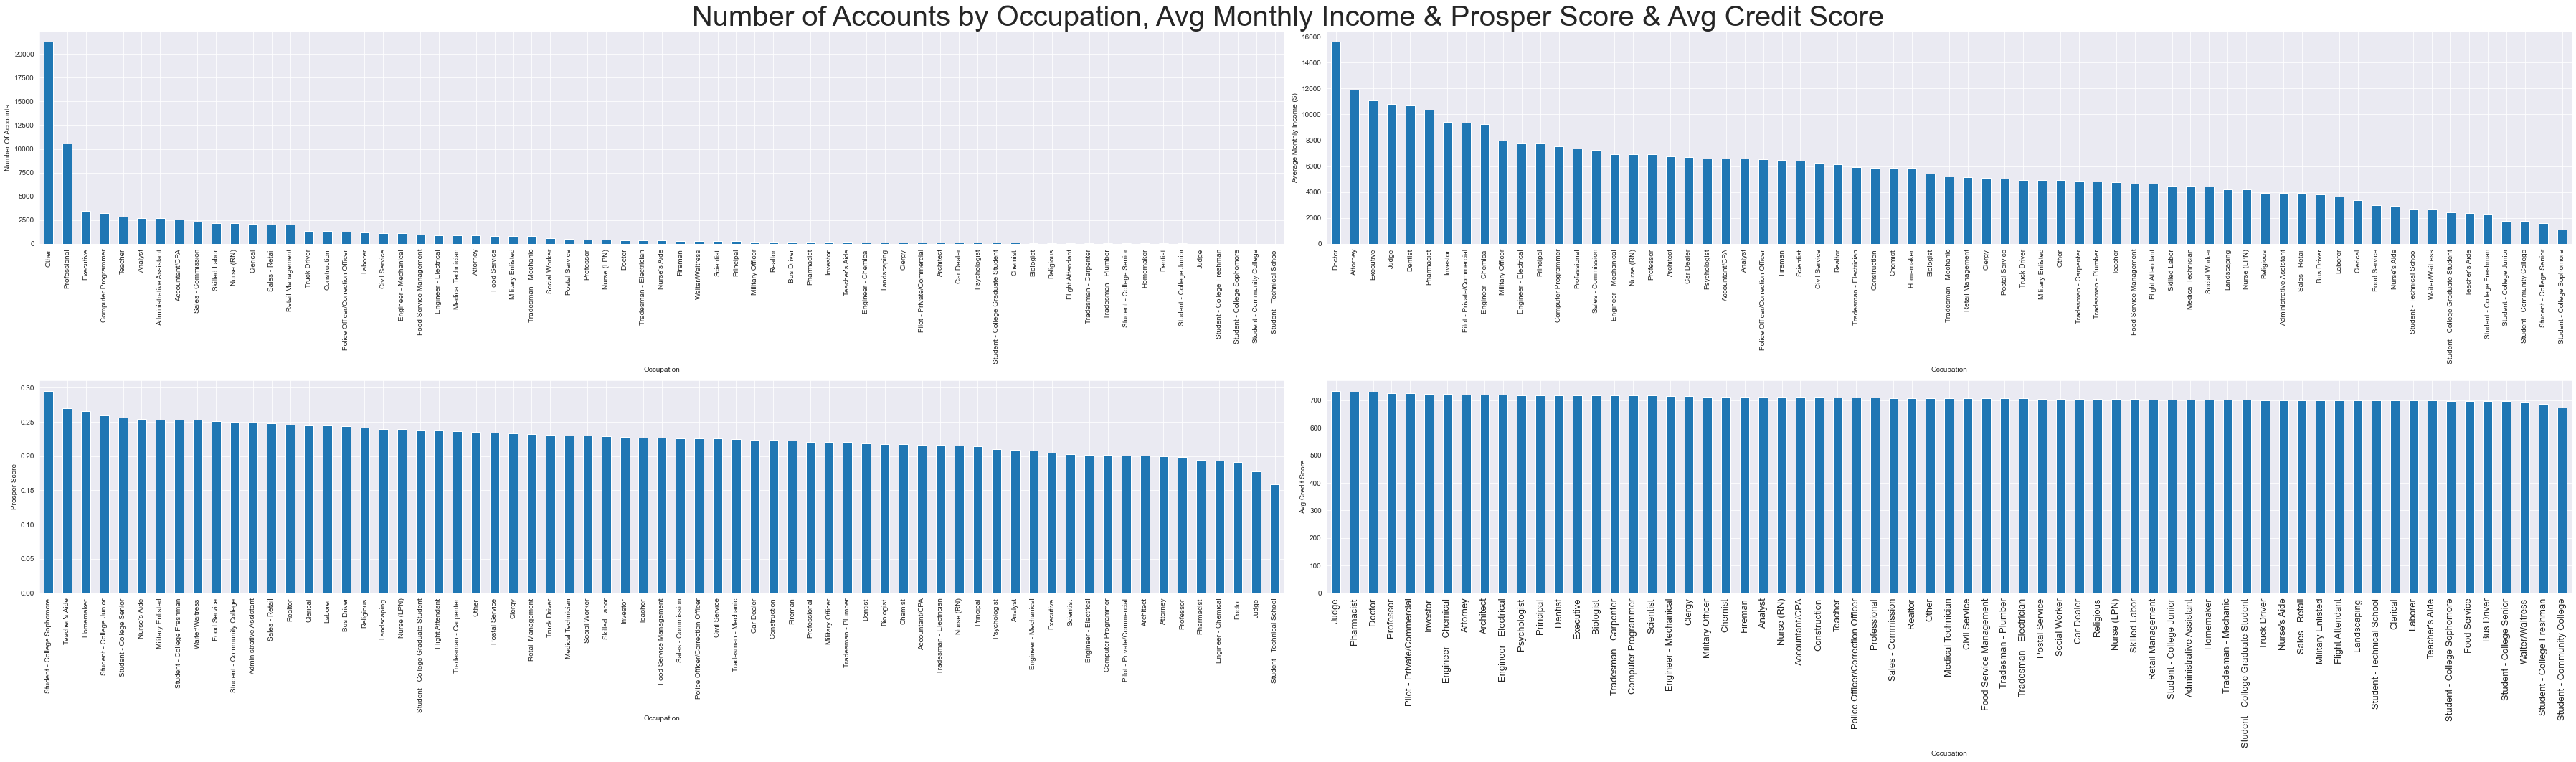

In [24]:
fig, ax = plt.subplots(2, 2,figsize=[50,15])

fig.suptitle("Number of Accounts by Occupation, Avg Monthly Income & Prosper Score & Avg Credit Score", fontsize=40)

occupation_counts.plot(kind='bar',  ylabel='Number Of Accounts', xlabel='Occupation', ax=ax[0][0]);
plt.xticks(rotation='vertical', size=13)

income_mean_by_occupation.plot(kind='bar',  ylabel='Average Monthly Income ($)', xlabel='Occupation', ax=ax[0][1]);
plt.xticks(rotation='vertical', size=13)

pScore_by_oaccupation.plot(kind='bar',  ylabel='Prosper Score', xlabel='Occupation', ax=ax[1][0]);
plt.xticks(rotation='vertical', size=13)

credit_score_avg.plot(kind='bar',  ylabel='Avg Credit Score', xlabel='Occupation', ax=ax[1][1]);
plt.xticks(rotation='vertical', size=13)

fig.tight_layout()

plt.savefig('./Plots/BarPlot_Occupation_Over_Time.jpg', dpi=200)
plt.show()

* For Occupations: We see that "Other" has the hieghest number of accounts followed by "Professional" 

* The Occupation with the highest avereage Income is Doctor with an average income of just under $16,000/Month, followed by Attorney, Excutive, Judge, Dentist & Pharmacist making over $10,000/Month

* The Occupation with the highest avereage Prosper Score is Student - College Sophomore with a Prosper Score average of just under 6.3

### Discuss the distribution(s) of your variable(s) of interest. Were there any unusual points? Did you need to perform any transformations?

* To summarize, the distribution of APR, Rate, and Score are:

    * APR: The distribution of APR is Unimodal and skewed to the right, with a single mode of 0.35797, indicating that the majority of the values are close to this value. The range and interquartile range are relatively small, indicating that the data is not spread out. There are no outliers in the data.

    * Rate: The distribution of Rate is Unimodal and skewed to the right, with a single mode of 0.3177, indicating that the majority of the values are close to this value. The range and interquartile range are relatively small, indicating that the data is not spread out. There are no outliers in the data.

    * Score: The distribution of Score is multimodal and skewed to the left, with a mode of 4.0 and mean of 5.95 being less than the median of 6.0, indicating that there might be multiple groups of data. The range and interquartile range are relatively wide, indicating that the data is spread out. There are no outliers in the data.

    * We also saw most accounts have a C rating  and a rating of AA (being the best) has only been assigned to just over 5,000 accounts

### Of the features you investigated, were there any unusual distributions? Did you perform any operations on the data to tidy, adjust, or change the form of the data? If so, why did you do this?

* Based on the statatics I can confidently say that distributions for APR and Rate are relatively the same. I also believe that by only using data after July 2009 we were able to get rid of any outliers in these two features. 

### Categorical variables.

In [25]:
numeric_vars = ['BorrowerAPR', 'BorrowerRate', 'ProsperRating (numeric)', 'ProsperScore']
categoric_vars = ['HR', 'E', 'D', 'C', 'B', 'A', 'AA']

## Bivariate Exploration
<a id='bivariate'></a>


## Borrower APR & Employment Status

<a id='bi_v1'></a>
[Back to Top](#top)


> In this section, investigate relationships between pairs of variables in your
data. Make sure the variables that you cover here have been introduced in some
fashion in the previous section (univariate exploration).

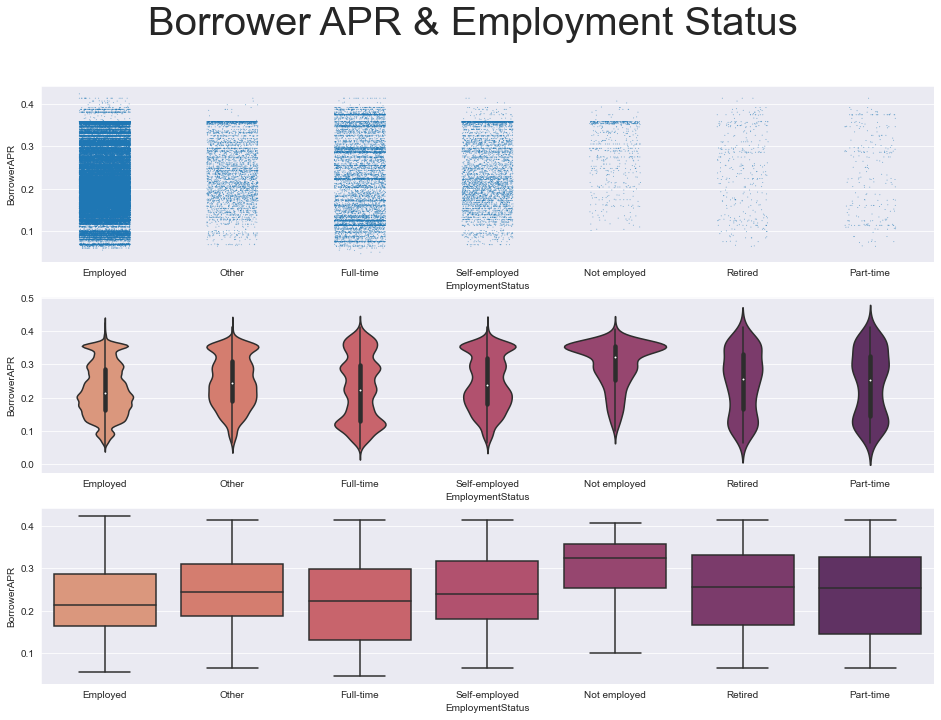

In [26]:
# creating 3 subplots axes[0], axes[1], axes[2] 
base_color = sb.color_palette("rocket_r", as_cmap=True)
scatter_color = sb.color_palette()[0]

fig, ax = plt.subplots(3,1,figsize=[16, 11])

fig.suptitle("Borrower APR & Employment Status", fontsize=40)

sb.stripplot(x= 'EmploymentStatus', y='BorrowerAPR', data=loans, alpha=0.6, ax=ax[0], jitter=0.2, s=1, color=scatter_color)
sb.violinplot(data=loans, x='EmploymentStatus', y='BorrowerAPR', ax=ax[1], palette='flare')
sb.boxplot(data=loans, x='EmploymentStatus', y='BorrowerAPR', ax=ax[2], palette='flare')


plt.savefig('./Plots/APR_&_Employment_Status.jpg', dpi=200)
plt.show()


* Based on the Plot above we can tell:
    
    * Employed and Full-Time have almost the same APR range.
    * Other and Self-Employed also seem to have the same range.
    * Not employed seem to concentrate more at a APR rate of .35 
    * Retired does have some concentration at around .29 & .35 APR
    * Part-Time seems to concentrate at three different APR levels: 0.11, 0.29 & 0.35
<br>
<br>
* No outliers observed

## Borrower Rate & Employment Status

<a id='bi_v2'></a>
[Back to Top](#top)

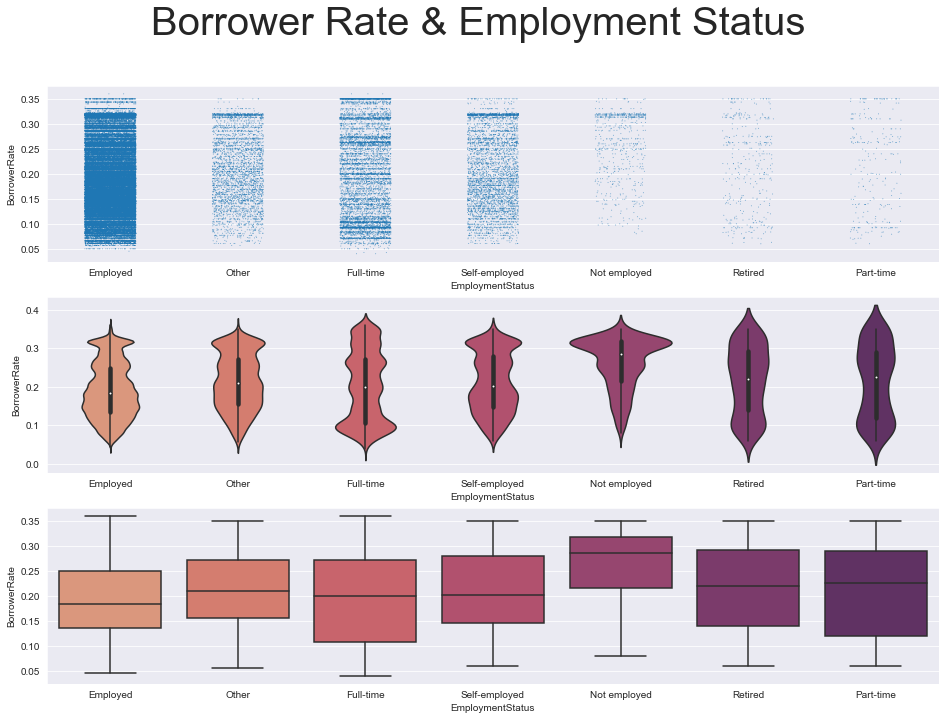

In [27]:
# creating 3 subplots axes[0], axes[1], axes[2] 

base_color = sb.color_palette("rocket_r", as_cmap=True)

fig, ax = plt.subplots(3,1,figsize=[16, 11])
sb.set_style("darkgrid", {"axes.facecolor": "#F0f0f1"})

fig.suptitle("Borrower Rate & Employment Status", fontsize=40)

sb.stripplot(x= 'EmploymentStatus', y='BorrowerRate', data=loans, alpha=0.6, ax=ax[0], jitter=0.2, s=1, color=scatter_color)
sb.violinplot(data=loans, x='EmploymentStatus', y='BorrowerRate', ax=ax[1], palette='flare')
sb.boxplot(data=loans, x='EmploymentStatus', y='BorrowerRate', ax=ax[2], palette='flare')

plt.savefig('./Plots/Rate_&_Employment_Status.jpg', dpi=200)
plt.show()

## NOTE: 

* We can see that accounts that have an employment status of "not employed" have more accounts with a Borrower Rate of 0.3 and higher


## Borrower APR & Occupation

<a id='bi_v3'></a>
[Back to Top](#top)

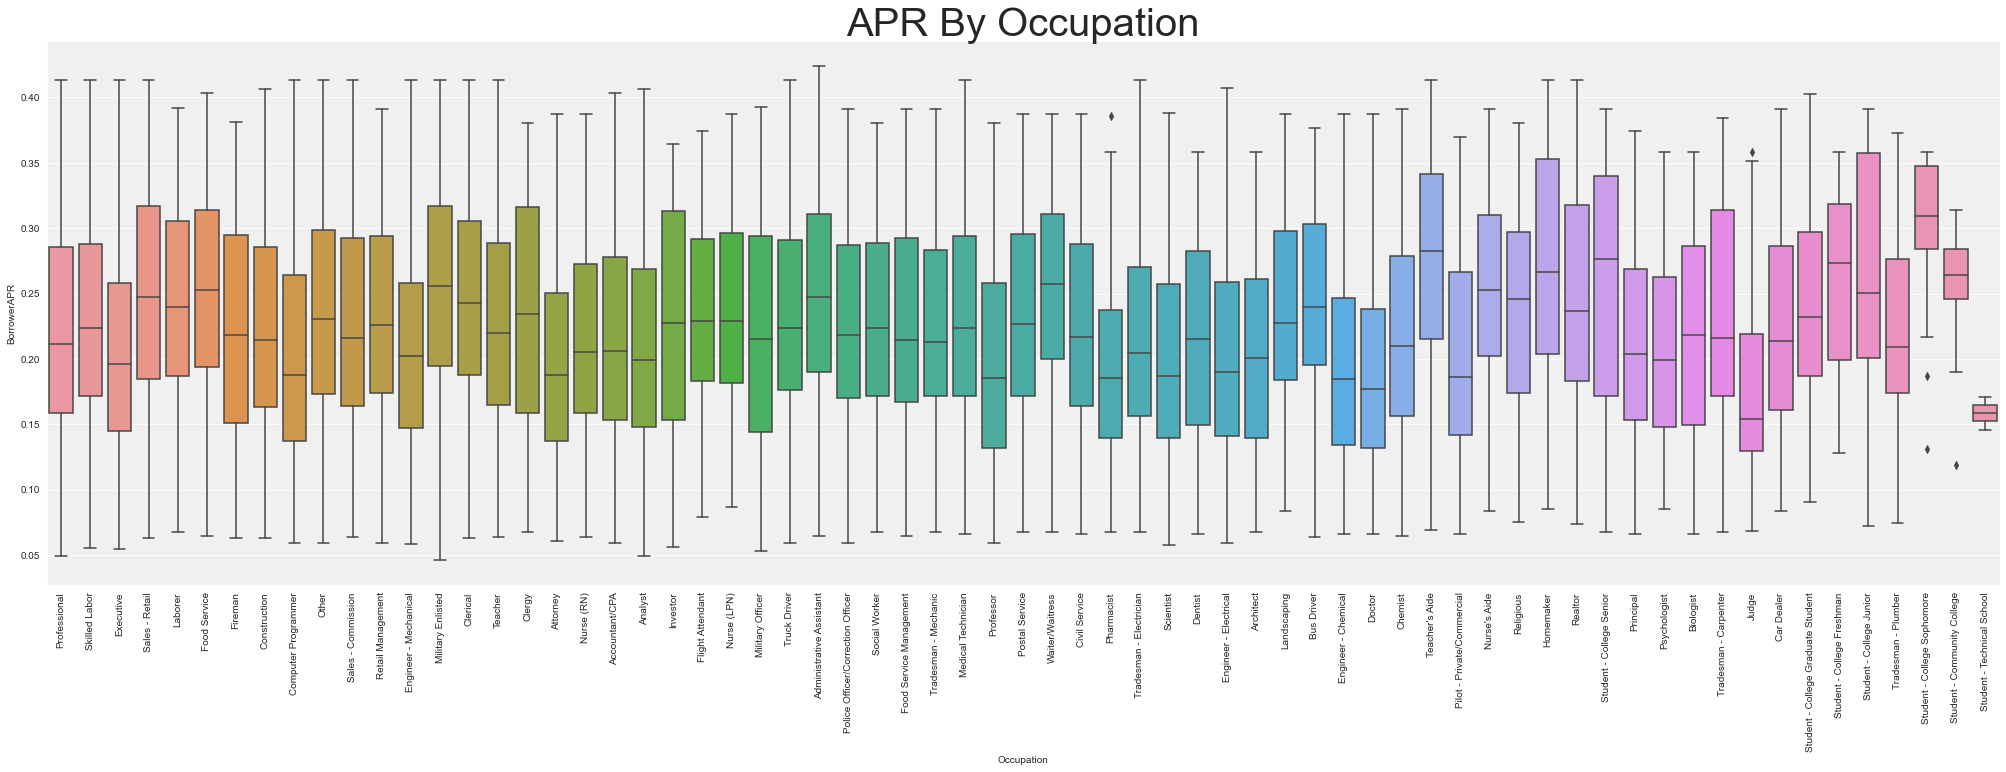

<Figure size 432x288 with 0 Axes>

In [28]:
def occu_boxplot(data, x, y, title):
    '''Plotting a boxplot of Occupations vs BorrowerAPR'''
    base_color = sb.color_palette()[0]
    plt.figure(figsize=(35, 10))
    sb.boxplot(data=loans, x='Occupation', y='BorrowerAPR')
    plt.title('APR By Occupation', fontsize=40)
    plt.xticks(rotation=90)
    plt.show()
    
    
occu_boxplot(data=loans, x= "Occupation", y="BorrowerAPR", title="APR by Occupation")

plt.savefig('./Plots/BoxPlot_APR_&_Occupation.jpg', dpi=200)

* We can see the following occupations have some outliers:

    * Pharmacist, Student - College Sophomore & Student - Community College

Let's take a closer look.


In [29]:

occu_to_keep = ['Pharmacist', 'Student - College Sophomore', 'Student - Community College']

occu_outliers = loans[loans['Occupation'].isin(occu_to_keep)]


In [30]:
occu_outliers[['BorrowerAPR', 'StatedMonthlyIncome']].describe()

,BorrowerAPR,StatedMonthlyIncome
count,251.000000,251.000000
mean,0.203096,9405.655378
std,0.077197,3874.046189
min,0.067160,0.000000
25%,0.143530,8391.666667
50%,0.189860,10000.000000
75%,0.254375,11250.000000
max,0.385780,25000.000000


In [31]:
pharmacist = ['Pharmacist']

pharma_outliers = loans[loans['Occupation'].isin(pharmacist)]

Sophomore = ['Student - College Sophomore']

sophomore_outliers = loans[loans['Occupation'].isin(Sophomore)]

comm_student = ['Student - Community College']

comm_outliers = loans[loans['Occupation'].isin(comm_student)]

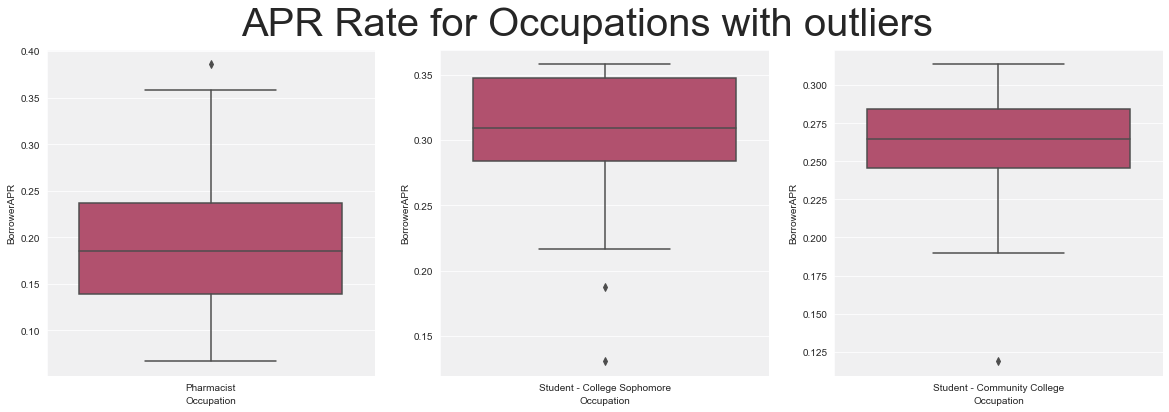

In [32]:
base_color = sb.color_palette()[0]
fig, ax = plt.subplots(1,3,figsize=[20, 6])

# main title:
fig.suptitle("APR Rate for Occupations with outliers", fontsize=40)

sb.boxplot(data=pharma_outliers, x='Occupation', y='BorrowerAPR', palette='flare', ax=ax[0]);
sb.boxplot(data=sophomore_outliers, x='Occupation', y='BorrowerAPR', palette='flare', ax=ax[1]);
sb.boxplot(data=comm_outliers, x='Occupation', y='BorrowerAPR', palette='flare', ax=ax[2]);

plt.savefig('./Plots/BoxPlot_APR_&_Occupation_Outliers.jpg', dpi=200)
plt.show()



##### Pharmacist

In [33]:
pharma_outliers = pharma_outliers.query("BorrowerAPR > 0.36")
pharma_outliers = pharma_outliers[['BorrowerAPR', 'ProsperScore', 'StatedMonthlyIncome']]



In [34]:
pharma_outliers

,BorrowerAPR,ProsperScore,StatedMonthlyIncome
51739,0.38578,5.0,2833.333333


##### Student - College Sophomore

In [35]:
sophomore_outliers = sophomore_outliers.query("BorrowerAPR < 0.2")
sophomore_outliers = sophomore_outliers[['BorrowerAPR', 'ProsperScore', 'StatedMonthlyIncome']]


In [36]:
sophomore_outliers

,BorrowerAPR,ProsperScore,StatedMonthlyIncome
83456,0.18725,6.0,1916.666667
91718,0.13068,9.0,1333.333333


##### Student - Community College

In [37]:
comm_outliers = comm_outliers.query("BorrowerAPR < 0.12")
comm_outliers = comm_outliers[['BorrowerAPR', 'ProsperScore', 'StatedMonthlyIncome']]


In [38]:
comm_outliers

,BorrowerAPR,ProsperScore,StatedMonthlyIncome
33106,0.11893,9.0,2250.0


<br>
* Upon further examination of the outliers identified in 3 occupations, it can be confidently stated that these are accurate data points and will not be eliminated from the dataset.
<br>

### Talk about some of the relationships you observed in this part of the investigation. How did the feature(s) of interest vary with other features in the dataset?

* The APR stripplot show a large number of accounts have an EmploymentStatus of Employed. Interetingly enough, those with a Full-Time status have the least accounts. 

* the APR range is similar for "Employed" and "Full-Time", "Other" and "Self-Employed", while "Not employed" have more accounts with APR rate of 0.3 and higher. "Retired" has some concentration at 0.29 and 0.35 APR. "Part-Time" has three different APR levels: 0.11, 0.29 & 0.35. "Pharmacist", "Student - College Sophomore" and "Student - Community College" have outliers, but they are confirmed to be accurate data points and will not be eliminated from the dataset.

### Did you observe any interesting relationships between the other features (not the main feature(s) of interest)?

* I found it interesting to see that two accounts with an occupation of Student - College Sophomore had a Prosper Score of 6 and 9 and an APR of .18 and .13. The occupation with the lowest APR was also a Student - Community College with a Prosper Score of 9.  


##### <b>The Borrower APR and Rate seem to be relatively the same and after looking into the Rate outliers and verifying them I will focus on APR and not the Rate going forward</b>

## Multivariate Exploration

<a id='multivariate'></a>

## Borrower APR & Debt To Income Ratio By Alpha Rating

<a id='multi_v1'></a>
[Back to Top](#top)

> Create plots of three or more variables to investigate your data even
further. Make sure that your investigations are justified, and follow from
your work in the previous sections.

* DebtToIncomeRatio:

    * The debt to income ratio of the borrower at the time the credit profile was pulled. This value is Null if the debt to income ratio is not available. This value is capped at 10.01 (any debt to income ratio larger than 1000% will be returned as 1001%).

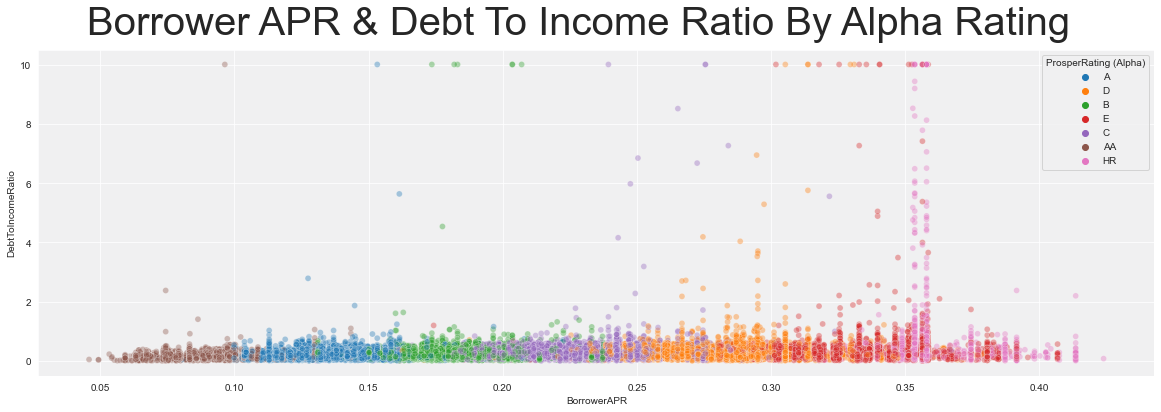

In [39]:
fig, ax = plt.subplots(figsize=[20, 6])

fig.suptitle("Borrower APR & Debt To Income Ratio By Alpha Rating", fontsize=40)


sb.scatterplot(data = loans, y='DebtToIncomeRatio', x='BorrowerAPR', hue='ProsperRating (Alpha)', alpha=3/8);

plt.savefig('./Plots/Scatter_APR_&_Debt_Income_Ratio_By_Alpha_Rating.jpg', dpi=200)
plt.show()

In [40]:
debt_ratio_unfiltered = loans['ProsperRating (Alpha)'].value_counts()

debt_ratio_unfiltered = debt_ratio_unfiltered.reset_index()

debt_ratio_total = debt_ratio_unfiltered['ProsperRating (Alpha)'].sum()

print(debt_ratio_total)
debt_ratio_unfiltered

84853


,index,ProsperRating (Alpha)
0,C,18345
1,B,15581
2,A,14551
3,D,14274
4,E,9795
5,HR,6935
6,AA,5372


In [41]:
debt_ratio_filtered = loans[loans['DebtToIncomeRatio'] > 5]

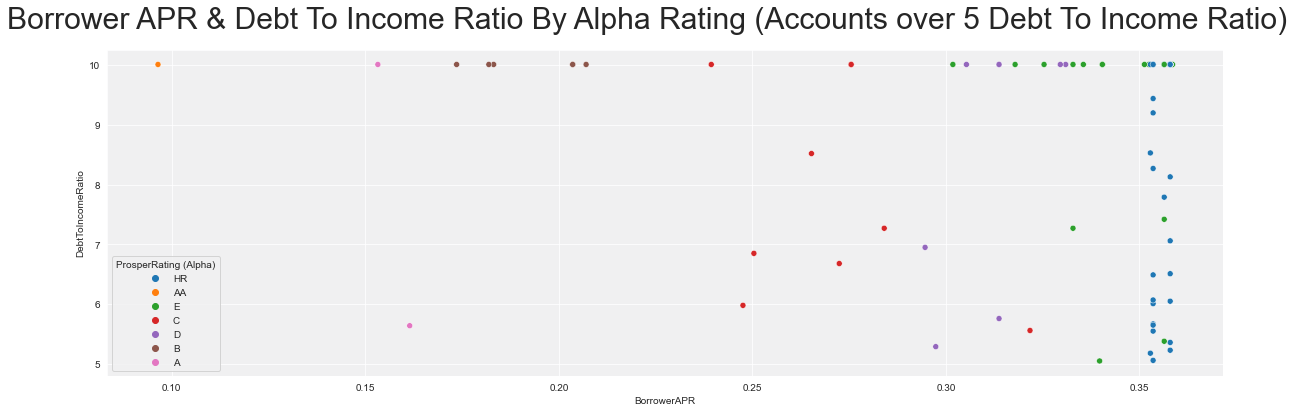

In [42]:
fig, ax = plt.subplots(figsize=[20, 6])

fig.suptitle("Borrower APR & Debt To Income Ratio By Alpha Rating (Accounts over 5 Debt To Income Ratio)", fontsize=30)

sb.scatterplot(data =debt_ratio_filtered, y='DebtToIncomeRatio', x='BorrowerAPR', hue='ProsperRating (Alpha)');

plt.savefig('./Plots/Scatter_APR_&_Debt_Income_Ratio_By_Alpha_Rating_Top_Half.jpg', dpi=200)
plt.show()

In [43]:
debt_ratio_filtered = debt_ratio_filtered['ProsperRating (Alpha)'].value_counts()

debt_ratio_filtered = debt_ratio_filtered.reset_index()

In [44]:
filtered_debt_ratio_total = debt_ratio_filtered['ProsperRating (Alpha)'].sum()

print(filtered_debt_ratio_total)
debt_ratio_filtered

79


,index,ProsperRating (Alpha)
0,HR,38
1,E,15
2,C,9
3,D,8
4,B,6
5,A,2
6,AA,1


* There are only 79 Accounts that have a Debt To Income Ratio > 5 

* 38 of those have a ProsperRating (Alpha) of HR which is the worst rating.

<a id='multi_v2'></a>

## Debt To Income Ration & Total Loan Amount by Prosper Rating (Alpha)

[Back to Top](#top)

[]

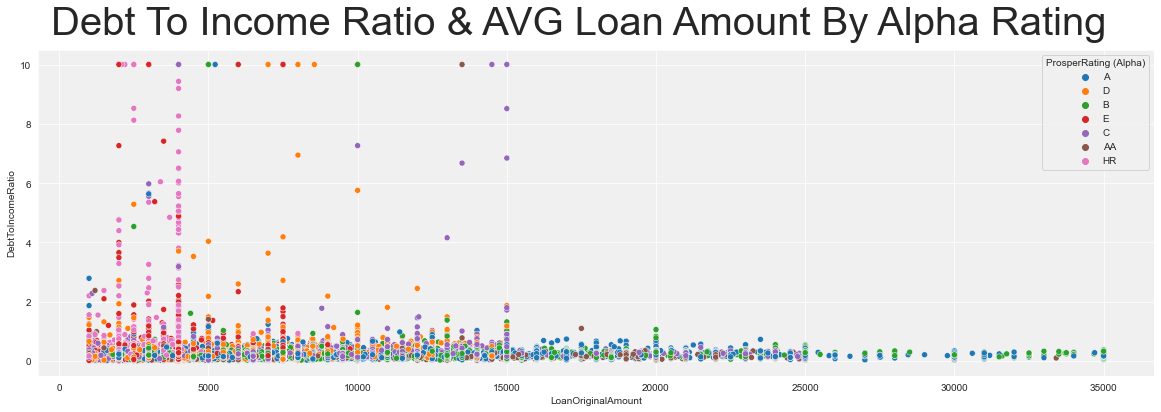

In [45]:
fig, ax = plt.subplots(figsize=[20, 6])

fig.suptitle("Debt To Income Ratio & AVG Loan Amount By Alpha Rating", fontsize=40)

sb.scatterplot(data =loans, y='DebtToIncomeRatio', x='LoanOriginalAmount', hue='ProsperRating (Alpha)');

plt.savefig('./Plots/DebtToIncomeRatio_&_TotalLoanAmount_by_Prosper_Rating_(Alpha).jpg', dpi=200)
plt.plot()

* We can see the majority of accounts hold a loan under $17,500

In [46]:
Rating_total = loans[loans['LoanOriginalAmount'] <= 40000]

Rating_total = Rating_total['ProsperRating (Alpha)'].value_counts()

Rating_total = Rating_total.reset_index()

In [47]:
loans_total = Rating_total['ProsperRating (Alpha)'].sum()
print(loans_total)
Rating_total

84853


,index,ProsperRating (Alpha)
0,C,18345
1,B,15581
2,A,14551
3,D,14274
4,E,9795
5,HR,6935
6,AA,5372


In [48]:
under_half = loans[loans['LoanOriginalAmount'] <= 17500]

under_half = under_half['ProsperRating (Alpha)'].value_counts()

under_half = under_half.reset_index()

In [49]:
under_half_total = under_half['ProsperRating (Alpha)'].sum()
percentage_under = (under_half_total / 84853) * 100
print(f' {np.round(percentage_under, 2)}%')
under_half

 90.61%


,index,ProsperRating (Alpha)
0,C,16588
1,D,14274
2,B,13148
3,A,11965
4,E,9795
5,HR,6935
6,AA,4183


* 90.61% of accounts have a loan under $17,500
* Accounts with an Alpha rating of C, D, B & A hold the majority of these loans. AA hold the least in loans

* Interestingly enough, all accounts with a loan over $17,500 have a Debt To Income Ratio of 2  and under. 

<a id='multi_v3'></a>

## Borrower APR Mean & Debt To Income Ratio Mean over time

[Back to Top](#top)

In [50]:
# Extract Month and Year from Listing Creation Date

loans['year'] = loans['ListingCreationDate'].dt.year
loans['month'] = loans['ListingCreationDate'].dt.month

In [51]:
# 1st plot
monthly_data = loans.groupby(['year', 'month'])['BorrowerAPR'].mean()
debtIncomeRatio_mean = loans.groupby(['year', 'month'])['DebtToIncomeRatio'].mean()
return_mean = loans.groupby(['year', 'month'])['EstimatedReturn'].mean()


# 2nd Plot 
originalLoan_mean = loans.groupby(['year', 'month'])['LoanOriginalAmount'].mean()
total_account = loans.groupby(['year', 'month'])['ListingNumber'].count()




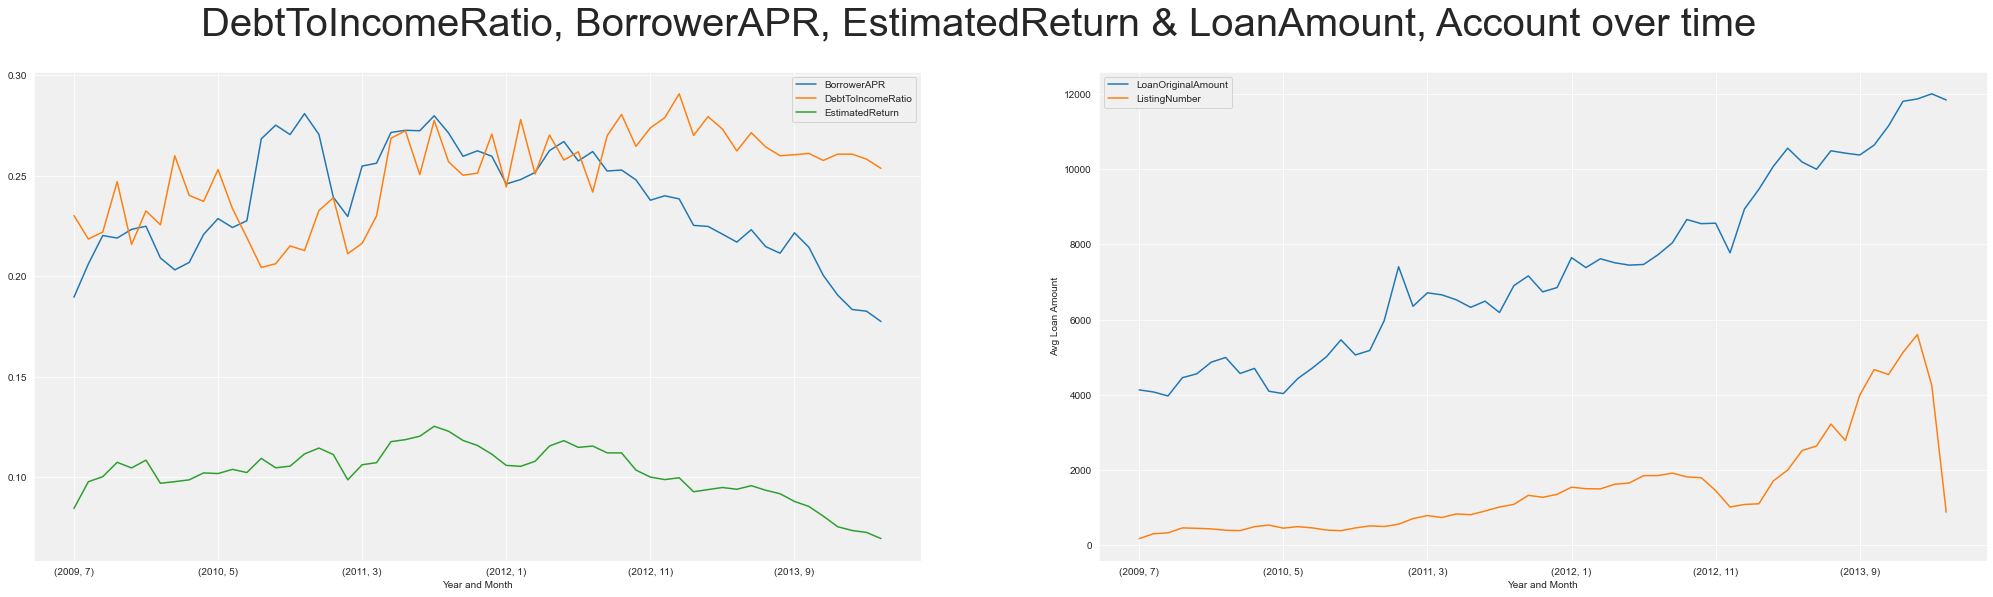

In [52]:

fig, ax = plt.subplots(1,2,figsize=[35, 9])

fig.suptitle("DebtToIncomeRatio, BorrowerAPR, EstimatedReturn & LoanAmount, Account over time", fontsize=40)

# Plot the data
monthly_data.plot(kind='line', xlabel='Year and Month',legend=['Avg Borrower APR'], ax=ax[0]);
debtIncomeRatio_mean.plot(kind='line', xlabel='Year and Month', legend=['Avg Debt To Income Ratio'], ax=ax[0]);
return_mean.plot(kind='line', xlabel='Year and Month', legend=['EstimatedReturn'], ax=ax[0]);

originalLoan_mean.plot(kind='line', xlabel='Year and Month', ylabel='Avg Loan Amount', legend=['Avg Loan Amount'], ax=ax[1]);
total_account.plot(kind='line', xlabel='Year and Month', ylabel='Avg Loan Amount', legend=['ListingNumber'], ax=ax[1]);

plt.savefig('./Plots/APR_DebtIncomeRatio_&_LoanAmount_Number_OF_Accounts.jpg', dpi=200)
plt.show()


In [53]:
account_monthly_data = loans.query("year > 2010 & year < 2012")

account_monthly_data = account_monthly_data['ListingKey'].value_counts().sum()

account_monthly_data

11442

In [54]:
11442/ 84853

0.13484496717853228

* APR, Debt To Income Ratio & Estimated Return:
    * We can see that the average APR in 2009 started at .19 and peaked at .28 twice

    * 11,442 or or 13.5% of all accounts were opened from 2010 to 2012 when the average APR was above .22

    * The Debt To Income Ratio average in 2009 started at .23  making new highs in 2011 and 2012 with a high of .29 just after Nov 2012

    * The lowest The Debt To Income Ratio average was .21 somewhere after June 2010.

    * I looks like the Return Ratio somewhat followed the Borrower APR pattern. Starting at just under .10 in 2009 and peaking at .13 between 2011 and 2012. However, once the APR started its downfall to a new low we can see that the estimated return ratio also followed suit.
    <br>

* Loan Ammount & Accounts Created

    * The Avg number of accounts opened stayed low hovering under 2000 each month, from 2009 until 2013 when it just to a peak of just under 6,000 in one month and drastically dropping to around 1,000 for the last month on record. 

    * On the other hand, the Avg loan amount increase year by year and peaking at 12,000 at around Dec of 2013

* It's interesting to see when APR broke under .24 in Nov 2012 we also saw a spike in accounts created roughly at the same time. People just wanted a higher loan at a lower rate.



"The average APR in 2009 began at .19 and reached two peaks of .28, while 13.5% of all accounts were opened from 2010 to 2012 when the average APR was above .22; furthermore, the Debt To Income Ratio average started at .23 in 2009 and rose to new highs in 2011 and 2012 with a peak of .29 just after Nov 2012, but also hit a low of .21 after June 2010."

<a id='multi_v4'></a>

## Loan Amounts & APR By Prosper Rating (Alpha) 

[Back to Top](#top)


* StimatedReturn:

    * The estimated return assigned to the listing at the time it was created. Estimated return is the difference between the Estimated Effective Yield and the Estimated Loss Rate. Applicable for loans originated after July 2009.

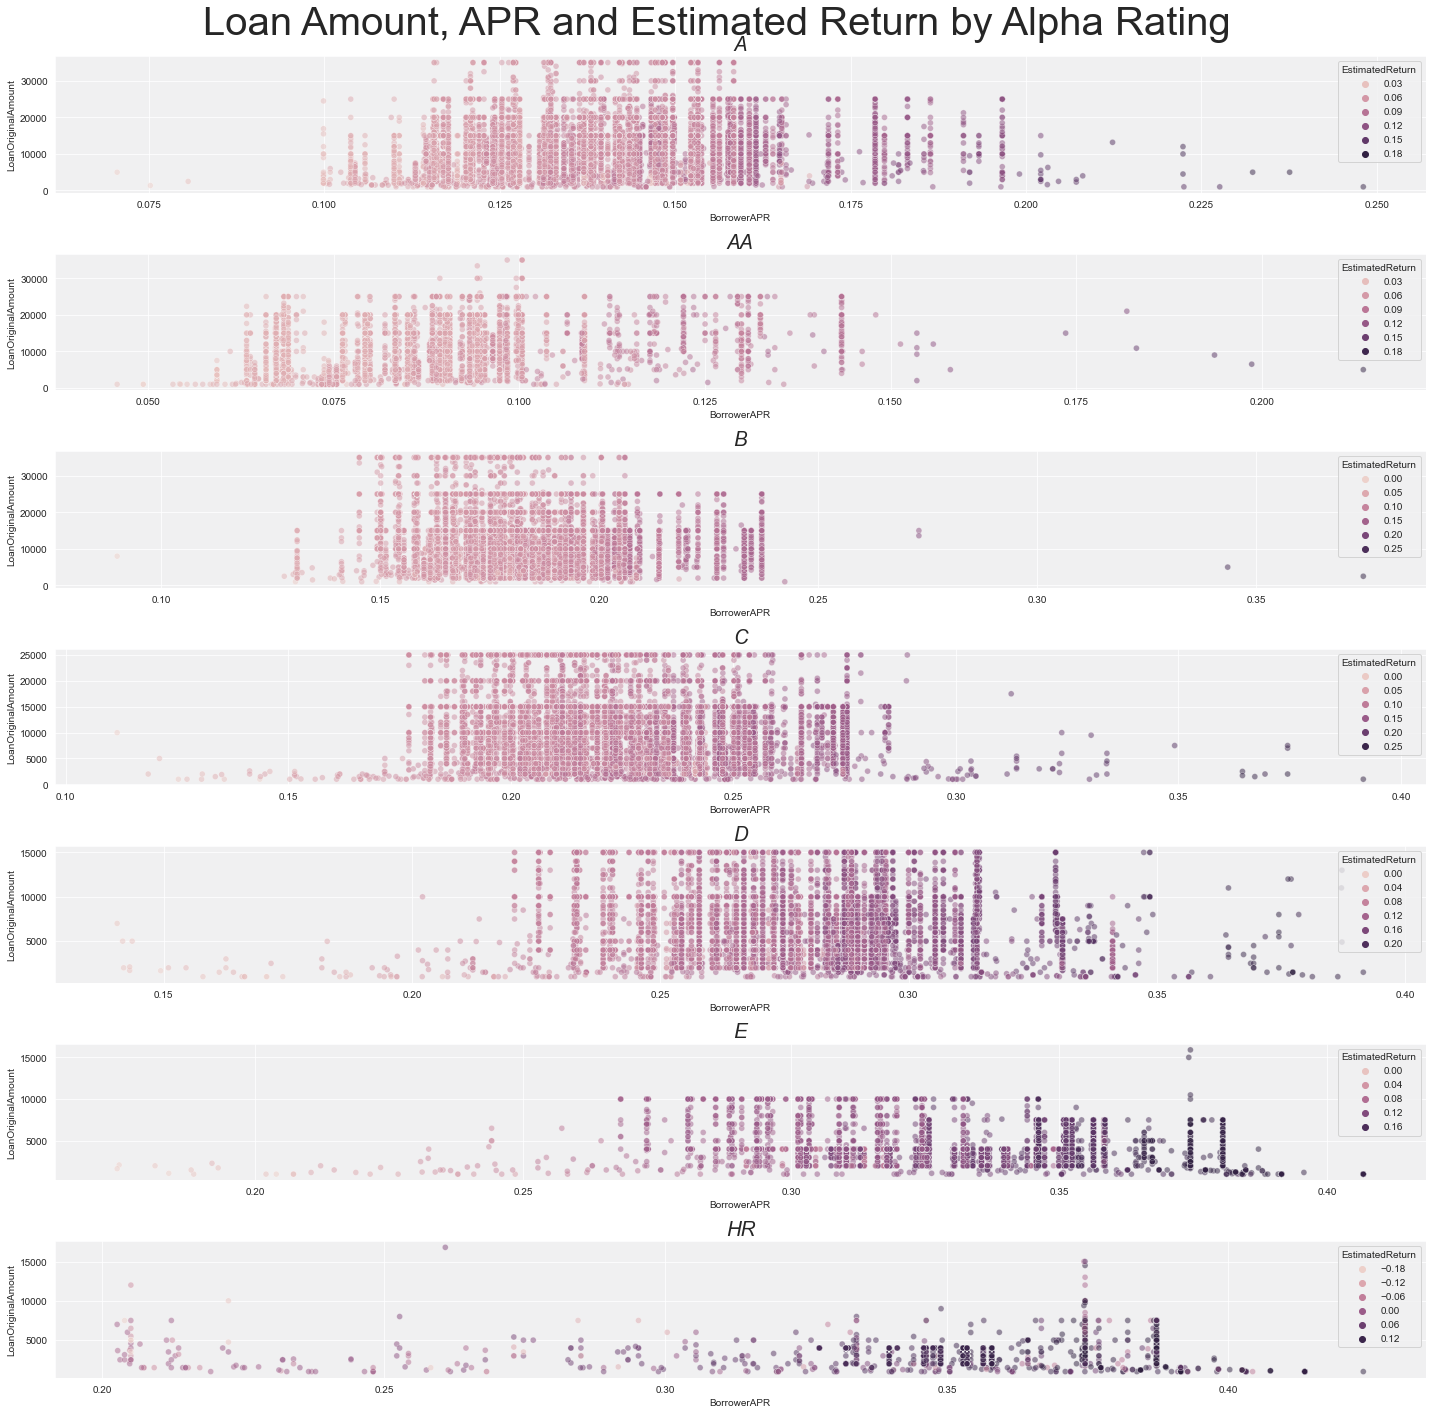

In [55]:
alphaRating_grouped = loans.groupby('ProsperRating (Alpha)')

# create a subplot for each group
fig, axes = plt.subplots(nrows=len(alphaRating_grouped), figsize=(20,20))

fig.suptitle("Loan Amount, APR and Estimated Return by Alpha Rating", fontsize=40)

# create a scatterplot for each group
for i, (name, group) in enumerate(alphaRating_grouped):
    sb.scatterplot(x='BorrowerAPR', y='LoanOriginalAmount', hue='EstimatedReturn', data=group, alpha=0.5, ax=axes[i])
    axes[i].set_title(name, fontsize=20, fontstyle='italic')

fig.tight_layout()

plt.savefig('./Plots/Scatter_DebtToIncome_StimatedReturnByAlphaRating.jpg', dpi=200)
plt.show()

* From the above scatter plots we can see that Alpha Rating of B and C have a max Estimated Return of .25 compared to HR rating which has a max Estimated Return of .12

* We can also see the majority of accounts with a E rating have a loan of $10,000 or less. Some account have a higher loan but not many.

* It should also be pointed out that more accounts with a rating of D, E and HR have a APR rate of .25 or higher.

<a id='multi_v5'></a>

#### Home Ownership and Prosper Score

[Back to Top](#top)


In [56]:
occupations = loans.dropna().groupby(['ProsperRating (Alpha)', 'Occupation'])

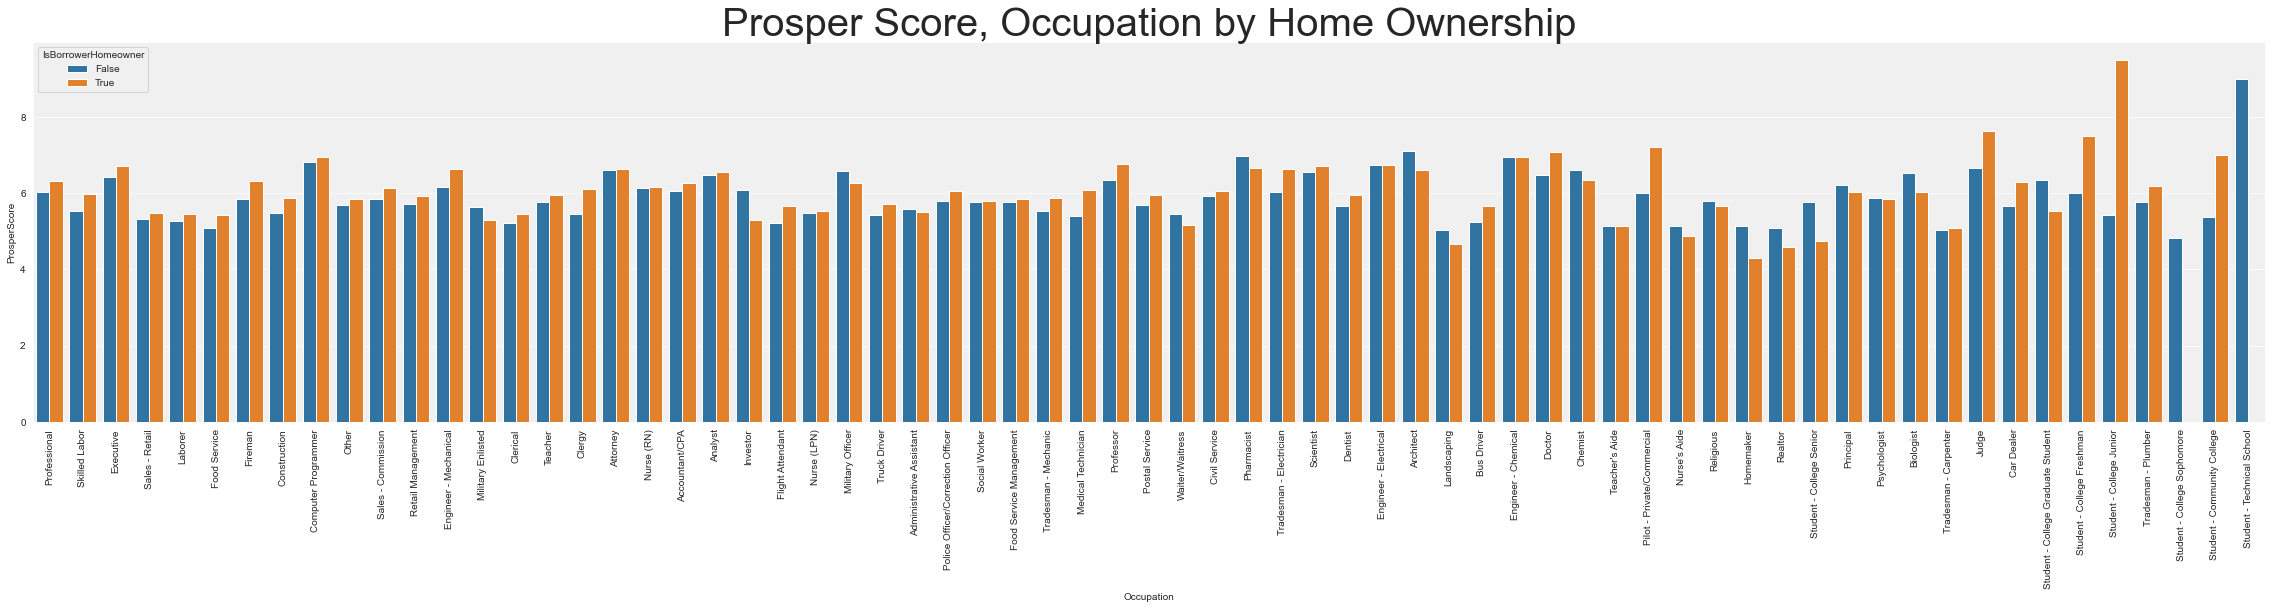

In [57]:


plt.figure(figsize = [40, 7])

sb.barplot(x='Occupation', y= 'ProsperScore', 
            hue='IsBorrowerHomeowner',
            ci=None,
            data=loans
           );

plt.xticks(rotation=90)
plt.title('Prosper Score, Occupation by Home Ownership', fontsize=40)

plt.savefig('./Plots/BarPlot_HomeOwnership_ProsperScore.jpg', dpi=200)
plt.show()

In [58]:
occupation_list = ['Other','Professional','Executive','Computer Programmer','Teacher','Analyst','Administrative Assistant','Accountant/CPA','Sales - Commission','Skilled Labor','Nurse (RN)','Clerical','Sales - Retail','Retail Management','Truck Driver','Construction','Police Officer/Correction Officer','Laborer','Civil Service','Engineer - Mechanical','Food Service Management','Engineer - Electrical','Medical Technician','Attorney','Food Service','Military Enlisted','Tradesman - Mechanic','Social Worker','Postal Service','Professor','Nurse (LPN)','Doctor','Tradesman - Electrician',"Nurse's Aide",'Fireman','Waiter/Waitress','Scientist','Principal','Realtor','Military Officer','Bus Driver','Pharmacist','Investor',"Teacher's Aide",'Engineer - Chemical','Landscaping','Clergy','Pilot - Private/Commercial','Architect','Car Dealer','Psychologist','Student - College Graduate Student','Chemist','Biologist','Religious','Flight Attendant','Tradesman - Carpenter', 'Tradesman - Plumber','Student - College Senior','Homemaker','Dentist','Student - College Junior','Judge','Student - College Freshman','Student - College Sophomore','Student - Community College','Student - Technical School']

occupation_count = len(occupation_list)

occupation_count

67

In [59]:
not_home_owner_by_occu = ['Military Enlisted', 'Military Officer', 'Investor', 'Administrative Assistant', 'Waiter/Waitress', 'Pharmacist', 'Architect', 'Landscaping', 'Chemist', "Teacher's Aide", "Nurse's Aide", 'Religious', 'Realtor', 'Student - College Senior', 'Psychologist', 'Student - College Graduate Student']

not_homeowner_count = len(not_home_owner_by_occu)

not_homeowner_percent = np.round(not_homeowner_count/occupation_count, 2)

not_homeowner_percent

0.24

* Occupations that are home owners have a higher Prosper Score. 76% to be exact. 

* Zero accounts listed as Student - College Sophomore & Student - Community College are home owners.


### Talk about some of the relationships you observed in this part of the investigation. Were there features that strengthened each other in terms of looking at your feature(s) of interest?

* The Miltivariate Analysis provided information on various financial metrics such as Debt To Income Ratio, ProsperRating, loan amount, and APR for a group of accounts. It highlighted that accounts with high Debt To Income Ratio (greater than 5) and a low ProsperRating (HR) are relatively rare, making up only a small percentage of the total accounts. 

* The majority of loans are for amounts less than $17,500, and these loans are mostly held by accounts with a moderate ProsperRating (C, D, B, and A). 

* The APR had some fluctuations over the years, with an average APR of around .19 in 2009 and peaking twice at .28. The Debt To Income Ratio also had some fluctuations over the years, with an average of .23 in 2009, reaching new highs in 2011 and 2012. 



### Were there any interesting or surprising interactions between features?

* It was pointed out that accounts with a moderate ProsperRating (B and C) have a higher estimated return compared to accounts with a low ProsperRating (HR). 

* It was noted that home-owning occupations tend to have a higher Prosper Score, and that no accounts listed as student-college sophomore or student-community college are home-owners.

## Conclusions
<a id='Conclusions'></a>


* Univariate: 

    * The APR data distribution is unimodal and skewed to the right, with a single mode of 0.35797, indicating that the majority of the values are close to this value. The range and interquartile range are relatively small, indicating that the data is not spread out. There are no outliers in the data. The Rate data distribution is also unimodal and skewed to the right, with a single mode of 0.3177 and small range and interquartile range, indicating that the data is not spread out. There are no outliers in the data. The Score data distribution is multimodal and skewed to the left, with a mode of 4.0 and mean of 5.95 being less than the median of 6.0, indicating that there might be multiple groups of data. The range and interquartile range are relatively wide, indicating that the data is spread out. There are no outliers in the data. Most accounts have a C rating and a rating of AA (being the best) has only been assigned to just over 5,000 accounts. Accounts with a moderate ProsperRating (B and C) have a higher estimated return compared to accounts with a low ProsperRating (HR). Home-owning occupations tend to have a higher Prosper Score, and no accounts listed as student-college sophomore or student-community college are home-owners. 
    <br>
    <br>
* Bivariate:

    * The plot shows that the APR range is similar for "Employed" and "Full-Time", "Other" and "Self-Employed", while "Not employed" have more accounts with APR rate of 0.3 and higher. "Retired" has some concentration at 0.29 and 0.35 APR. "Part-Time" has three different APR levels: 0.11, 0.29 & 0.35. "Pharmacist", "Student - College Sophomore" and "Student - Community College" have outliers, but they are confirmed to be accurate data points and will not be eliminated from the dataset. 
    <br>
    <br>
* Multivariate:

    * The multivariate analysis provides information on various financial metrics such as Debt To Income Ratio, ProsperRating, loan amount, and APR for a group of accounts. It shows that accounts with high Debt To Income Ratio (greater than 5) and a low ProsperRating (HR) are relatively rare. The majority of loans are for amounts less than 17,500 and these loans are mostly held by accounts with a moderate ProsperRating (C, D, B, and A). The APR had some fluctuations over the years, with an average of .19 in 2009 and peaking twice at .28. The Debt To Income Ratio also had some fluctuations, with an average of .23 in 2009, reaching new highs in 2011 and 2012. The analysis shows that the number of accounts opened stayed low until 2013, when it peaked at just under 6,000 in one month, and drastically dropped to around 1,000 for the last month on record. On the other hand, the average loan amount increased year by year and peaked at 12,000 at around Dec of 2013. When APR broke under .24 in Nov 2012, we also saw a spike in accounts created roughly at the same time, suggesting that people wanted a higher loan at a lower rate.

[Back to Top](#top)